In [ ]:
import numpy as np
import pandas as pd
import random
random.seed(100)

Participation rate plotting for EDA

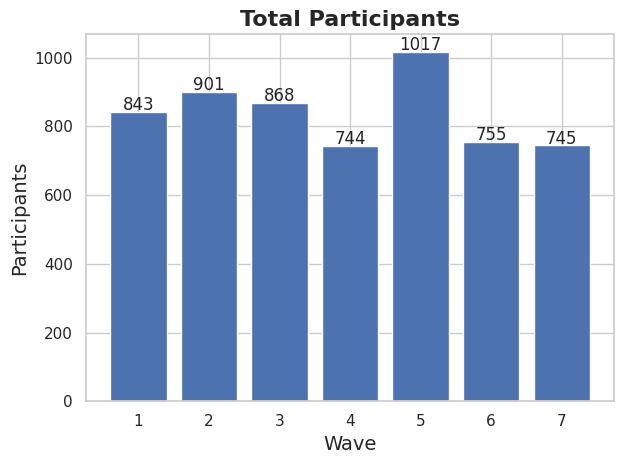

In [ ]:
# Participation attrition rate figure (generated by ChatGPT)
participation = pd.read_csv('/content/Participant_Info.csv', sep=';')
total_participants = participation.iloc[:, 10:17].sum().values
# Create figure and axes
fig, ax = plt.subplots()

# Plot the histogram
ax.bar(np.arange(len(total_participants)), total_participants, align='center', color='b')

# Add value labels on top of each bar
for i, val in enumerate(total_participants):
    ax.text(i, val + 5, str(val), ha='center')

# Set x-axis tick labels
ax.set_xticks(np.arange(len(total_participants)))
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7'])

# Set axis labels and title
ax.set_xlabel('Wave', fontsize=14)
ax.set_ylabel('Participants', fontsize=14)
ax.set_title('Total Participants', fontsize=16, fontweight='bold')

# Format the plot
ax.grid(True)
fig.tight_layout()

# Show the plot
#plt.show()

plt.savefig('totalparticipants.png', dpi=400)

**Pre-processing**

Physical activity (accerelometer data)

In [ ]:
# Load accelerometer data, aggregate (compute average) per wave per child
df_pa_raw = pd.read_csv('/content/Fitbit_W17_cleaned_imputation.csv', sep=';')
df_pa_ungrouped = {'Child': df_pa_raw['Child'], 'Wave': df_pa_raw['Wave'], 'Steps': df_pa_raw['Steps']}
df_pa_ungrouped = pd.DataFrame(df_pa_ungrouped)
df_pa = df_pa_ungrouped.groupby(['Child', 'Wave']).mean()
df_pa = df_pa.reset_index()

# Create separate columns for every wave
df_pa_pivot = df_pa.pivot(index='Child', columns='Wave', values='Steps')
df_pa_pivot.columns = ['Steps1', 'Steps2', 'Steps3', 'Steps4', 'Steps5', 'Steps6', 'Steps7']
df_pa_pivot.reset_index(inplace=True)
df_pa_pivot.to_csv('PA_stepcount.csv', index=False)

Social network data (Wave 3)

In [ ]:
# Load all data
network_datawave1 = pd.read_csv('/content/W1_Sociometric_long.csv', sep=';')
network_datawave2 = pd.read_csv('/content/W2_Sociometric_long.csv', sep=';')
network_datawave3 = pd.read_csv('/content/W3_Sociometric_long.csv', sep=';')
network_datawave4 = pd.read_csv('/content/W4_Sociometric_long.csv', sep=';')
network_datawave5 = pd.read_csv('/content/W5_Sociometric_long.csv', sep=';')
network_datawave6 = pd.read_csv('/content/W6_Sociometric_long.csv', sep=';')
network_datawave7 = pd.read_csv('/content/W7_Sociometric_long.csv', sep=';')

In [ ]:
# Building directed networks and extracting centrality measures: function generated using ChatGPT
import networkx as nx

def build_directed_network(data):
    """
    Build a directed network using NetworkX and compute centrality measures.

    Args:
        data (pd.DataFrame): Data with 3 columns: 'Child', 'Alter', and 'Variable'.

    Returns:
        pd.DataFrame: DataFrame containing the centrality measures for each child per unique value of 'Variable'.
    """

    # Initialize an empty DataFrame to store the centrality measures
    centrality_measures = pd.DataFrame()

    # Get unique values of 'Variable' column
    unique_variables = data['Variable'].unique()
    unique_variables = np.array([u for u in unique_variables if u.startswith('GEN_')])

    # Loop through unique values of 'Variable' column
    for var in unique_variables:
        # Filter data for the current 'Variable' value
        filtered_data = data[data['Variable'] == var]

        # Build directed network using NetworkX
        G = nx.DiGraph()
        for _, row in filtered_data.iterrows():
            G.add_edge(row['Child'], row['Alter'])
        # Reverse the graph in order for the centrality measures to be intuitive
        G = nx.DiGraph.reverse(G)

        # Compute centrality measures
        out_degree_centrality = nx.out_degree_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)
        eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

        # Convert centrality measures to DataFrames
        out_degree_df = pd.DataFrame.from_dict(out_degree_centrality, orient='index', columns=['OutDegree_' + var])
        closeness_df = pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['Closeness_' + var])
        betweenness_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['Betweenness_' + var])
        eigenvector_df = pd.DataFrame.from_dict(eigenvector_centrality, orient='index', columns=['Eigenvector_' + var])

        # Concatenate centrality measures DataFrames horizontally
        centrality_measures = pd.concat([centrality_measures, out_degree_df, closeness_df, betweenness_df, eigenvector_df], axis=1)

        # Only keep the children participating in the research, not the remaining 'Alters'
        centrality_measures = centrality_measures[centrality_measures.index.isin(df_demographics.index.values)]

    return centrality_measures

# Apply function
centrality_wave1 = build_directed_network(network_datawave1)
centrality_wave2 = build_directed_network(network_datawave2)
centrality_wave3 = build_directed_network(network_datawave3)
centrality_wave4 = build_directed_network(network_datawave4)
centrality_wave5 = build_directed_network(network_datawave5)
centrality_wave6 = build_directed_network(network_datawave6)
centrality_wave7 = build_directed_network(network_datawave7)

# Concatenate the dataframes, take the mean of every centrality measure per child
df_centrality = pd.concat([centrality_wave1, centrality_wave2, centrality_wave3, centrality_wave4,
                           centrality_wave5, centrality_wave6, centrality_wave7])
df_centrality = df_centrality.groupby(df_centrality.index).mean()
df_centrality.to_csv('df_centrality.csv', index=True, index_label = 'Child')

Dietary data (Wave 1)

In [ ]:
# Load data
df_questions_wave1 = pd.read_csv('/content/W1_Main_questions.csv', sep=';')
df_questions_wave2 = pd.read_csv('/content/W2_Main_questions.csv', sep=';')
df_questions_wave3 = pd.read_csv('/content/W3_Main_questions.csv', sep=';')
df_questions_wave4 = pd.read_csv('/content/W4_Main_questions.csv', sep=';')
df_questions_wave5 = pd.read_csv('/content/W5_Main_questions.csv', sep=';')
df_questions_wave6 = pd.read_csv('/content/W6_Main_questions.csv', sep=';')
df_questions_wave7 = pd.read_csv('/content/W7_Main_questions.csv', sep=';')

In [ ]:
# Convert snack and drink lists to total calorie counts (parts generated by ChatGPT)
def clean_diet_data(data):
    """
    Extracts dietary data from questionnaire data per wave.

    Args:
        data (pd.DataFrame): DataFrame

    Returns:
        pd.DataFrame: DataFrame containing calorie counts for drink and snack intake separately for this wave.
    """
    # Keep columns pertaining to dietary intake, drop metadata
    data = pd.concat([data['Child'], data.filter(regex=r'^DI_FFQ', axis=1)], axis=1)
    data = data.drop(data.filter(regex='TriggerDate|TriggerTime|Weekend|thirst|hunger').columns, axis=1)
    
    # Sum the split columns
    data = data.rename(columns = lambda x: x.strip('_1'))
    data = data.rename(columns = lambda x: x.strip('.2'))
    data = data.groupby(lambda x:x, axis=1).sum()

    # Multiply every drink and snack by calorie count (provided by MyMovez researchers)
    # Define a dictionary to store calorie counts for different food items
    calorie_dict = {'smallcookie': 51.79, 'largecookie': 222.28, 'wrappedcookie': 149.20, 
                    'chocolate': 50.33, 'chocobars': 185.34, 'candy': 18.37, 'chips': 51.49, 
                    'nuts': 141.43, 'fruit': 82.02, 'salads': 35.45, 'vegetables': 6.09, 
                    'warmsnacks': 190.34, 'cheese': 33.83, 'sausage': 31.33, 'yoghurt': 98.71, 
                    'icecream': 188.40, 'water': 0, '_milk': 90.60, 'lightmilk': 59.22, 
                    'sweetmilk': 117.27, 'coffeetea': 2.19, 'coffeeteasugar': 28.85, 
                    'sodalight': 2.49, 'soda': 81.22, 'lemonade': 74.86, '_juice': 84.45, 
                    'fruityjuice': 77.76, 'sportsdrink': 200.28, 'energydrink': 114.81}
    
    # Iterate over columns in the dataframe
    for col in data.columns:
        # Check if column ends with known food item names
        for food_item in calorie_dict.keys():
            if col.endswith(food_item):
                # Multiply the values in the column by the respective calorie count
                data[col] = data[col] * calorie_dict[food_item]

        # Take average of all measured days (amount of days differs per wave)
        # snacks
        data['snacks_smallcookie'] = data[[col for col in data.columns if col.endswith('smallcookie')]].mean(axis=1)
        data['snacks_largecookie'] = data[[col for col in data.columns if col.endswith('largecookie')]].mean(axis=1)
        data['snacks_wrappedcookie'] = data[[col for col in data.columns if col.endswith('wrappedcookie')]].mean(axis=1)
        data['snacks_chocolate'] = data[[col for col in data.columns if col.endswith('chocolate')]].mean(axis=1)
        data['snacks_chocobars'] = data[[col for col in data.columns if col.endswith('chocobars')]].mean(axis=1)
        data['snacks_candy'] = data[[col for col in data.columns if col.endswith('candy')]].mean(axis=1)
        data['snacks_chips'] = data[[col for col in data.columns if col.endswith('chips')]].mean(axis=1)
        data['snacks_nuts'] = data[[col for col in data.columns if col.endswith('nuts')]].mean(axis=1)
        data['snacks_fruit'] = data[[col for col in data.columns if col.endswith('fruit')]].mean(axis=1)
        data['snacks_salads'] = data[[col for col in data.columns if col.endswith('salads')]].mean(axis=1)
        data['snacks_vegetables'] = data[[col for col in data.columns if col.endswith('vegetables')]].mean(axis=1)
        data['snacks_warmsnacks'] = data[[col for col in data.columns if col.endswith('warmsnacks')]].mean(axis=1)
        data['snacks_cheese'] = data[[col for col in data.columns if col.endswith('cheese')]].mean(axis=1)
        data['snacks_sausage'] = data[[col for col in data.columns if col.endswith('sausage')]].mean(axis=1)
        data['snacks_yoghurt'] = data[[col for col in data.columns if col.endswith('yoghurt')]].mean(axis=1)
        data['snacks_icecream'] = data[[col for col in data.columns if col.endswith('icecream')]].mean(axis=1)
        # drinks
        data['drinks_water'] = data[[col for col in data.columns if col.endswith('water')]].mean(axis=1)
        data['drinks_milk'] = data[[col for col in data.columns if col.endswith('_milk')]].mean(axis=1)
        data['drinks_lightmilk'] = data[[col for col in data.columns if col.endswith('lightmilk')]].mean(axis=1)
        data['drinks_sweetmilk'] = data[[col for col in data.columns if col.endswith('sweetmilk')]].mean(axis=1)
        data['drinks_coffeetea'] = data[[col for col in data.columns if col.endswith('coffeetea')]].mean(axis=1)
        data['drinks_coffeeteasugar'] = data[[col for col in data.columns if col.endswith('coffeeteasugar')]].mean(axis=1)
        data['drinks_sodalight'] = data[[col for col in data.columns if col.endswith('sodalight')]].mean(axis=1)
        data['drinks_soda'] = data[[col for col in data.columns if col.endswith('soda')]].mean(axis=1)
        data['drinks_lemonade'] = data[[col for col in data.columns if col.endswith('lemonade')]].mean(axis=1)
        data['drinks_juice'] = data[[col for col in data.columns if col.endswith('_juice')]].mean(axis=1)
        data['drinks_fruityjuice'] = data[[col for col in data.columns if col.endswith('fruityjuice')]].mean(axis=1)
        data['drinks_sportsdrink'] = data[[col for col in data.columns if col.endswith('sportsdrink')]].mean(axis=1)
        data['drinks_energydrink'] = data[[col for col in data.columns if col.endswith('energydrink')]].mean(axis=1)

        # Sum calorie intake (snacks & drinks separately)
        data['calories_SNACKS'] = data[[col for col in data.columns if col.startswith('snacks_')]].sum(axis=1)
        data['calories_DRINKS'] = data[[col for col in data.columns if col.startswith('drinks_')]].sum(axis=1)

        # Drop columns per snack item
        data = data.drop(data.filter(regex=r'^snacks_').columns, axis=1)
        data = data.drop(data.filter(regex=r'^drinks_').columns, axis=1) 

        # Delete missing calorie counts
        data = data[(data['calories_SNACKS'] != 0) | (data['calories_DRINKS'] != 0)]

    return data

FileNotFoundError: ignored

In [ ]:
# Apply function to all waves
diet_wave1 = clean_diet_data(df_questions_wave1)
diet_wave2 = clean_diet_data(df_questions_wave2)
diet_wave3 = clean_diet_data(df_questions_wave3)
diet_wave4 = clean_diet_data(df_questions_wave4)
diet_wave5 = clean_diet_data(df_questions_wave5)
diet_wave6 = clean_diet_data(df_questions_wave6)
diet_wave7 = clean_diet_data(df_questions_wave7)

# Drop original data
diet_wave1 = diet_wave1.drop(diet_wave1.filter(regex=r'^DI_FFQ').columns, axis=1)
diet_wave2 = diet_wave2.drop(diet_wave2.filter(regex=r'^DI_FFQ').columns, axis=1)
diet_wave3 = diet_wave3.drop(diet_wave3.filter(regex=r'^DI_FFQ').columns, axis=1)
diet_wave4 = diet_wave4.drop(diet_wave4.filter(regex=r'^DI_FFQ').columns, axis=1)
diet_wave5 = diet_wave5.drop(diet_wave5.filter(regex=r'^DI_FFQ').columns, axis=1)
diet_wave6 = diet_wave6.drop(diet_wave6.filter(regex=r'^DI_FFQ').columns, axis=1)
diet_wave7 = diet_wave7.drop(diet_wave7.filter(regex=r'^DI_FFQ').columns, axis=1)

# NOTE: snack consumption not measured in Wave 6 and 7 (only drinks)
# Half of snack calorie counts for wave 5 is missing
# Disregard snack calorie counts for wave 5, 6 and 7
diet_wave5 = diet_wave5.drop(columns=['calories_SNACKS'])
diet_wave6 = diet_wave6.drop(columns=['calories_SNACKS'])
diet_wave7 = diet_wave7.drop(columns=['calories_SNACKS'])

#Concatenate the dataframes
df_diet = pd.concat([diet_wave1.set_index('Child'), diet_wave2.set_index('Child'), 
                       diet_wave3.set_index('Child'), diet_wave4.set_index('Child'), 
                       diet_wave5.set_index('Child'), diet_wave6.set_index('Child'), 
                       diet_wave7.set_index('Child')], axis=1, keys=['1', '2', '3', '4', '5', '6', '7'])
df_diet.columns = [f'{col[0]}_{col[1]}' for col in df_diet.columns]
df_diet = df_diet.reset_index()
df_diet.to_csv('df_diet.csv', index=False)

NameError: ignored

Demographics: age, gender, school level



In [ ]:
#Goal: dataset with age, primary/secondary school, gender (same over every wave)

#Filter on relevant columns, convert school level to binary variable
demographics = pd.read_csv('/content/Participant_Info.csv', sep=';')
demographics = pd.concat([demographics['Child'], pd.get_dummies(demographics['Level']), 
                          demographics['Age_W1'], demographics['Age_W5'], demographics['Sex']], axis=1)
demographics = demographics.drop(['Secondary'], axis=1)
demographics = demographics.rename(columns={'Primary': 'Level'})
demographics.to_csv('demographicsAgeSchoolGender.csv', index=False)
#Level: 1 is primary, 0 is secondary - Gender: 1 is female, 0 is male

FileNotFoundError: ignored

In [ ]:
ageschoolgender = pd.read_csv('/content/demographicsAgeSchoolGender.csv')
ageschoolgender['Sex'].value_counts()

Demographics: socioeconomic status (FAS)

In [ ]:
# NOTE: FAS (Family Affluence Scale) is only measured in Wave 2, 4 and 6
df_questions_wave2 = pd.read_csv('/content/W2_Main_questions.csv', sep=';')
df_questions_wave4 = pd.read_csv('/content/W4_Main_questions.csv', sep=';')
df_questions_wave6 = pd.read_csv('/content/W6_Main_questions.csv', sep=';')

def create_FAS(data):
    """
    Aggregates scale items for the Family Affluence Scale by summing them

    Args:
        data (pd.DataFrame): DataFrame

    Returns:
        pd.DataFrame: DataFrame containing 2 columns: 'Child' and 'FAS'

    """
    # Keep columns pertaining to the FAS, drop metadata
    data = pd.concat([data['Child'], data.filter(regex=r'^GEN_FAS', axis=1)], axis=1)
    data = data.drop(data.filter(regex='TriggerDate|TriggerTime|Weekend').columns, axis=1)

    # Delete missing values
    data = data.dropna(subset=data.columns[1:7], how='any')

    # Sum the variables
    data['FAS'] = data.filter(regex=r'^GEN_FAS', axis=1).sum(axis=1)

    # Drop the original columns
    data.drop(data.columns[1:7], axis=1, inplace=True)

    return data

# Apply function to all relevant waves
FAS_wave2 = create_FAS(df_questions_wave2)
FAS_wave4 = create_FAS(df_questions_wave4)
FAS_wave6 = create_FAS(df_questions_wave6)

# Concatenate the dataframes, take the mean if there are several FAS values per child
df_FAS = pd.concat([FAS_wave2, FAS_wave4, FAS_wave6])
df_FAS = df_FAS.groupby('Child').mean()
df_FAS.reset_index(inplace=True)

df_FAS.to_csv('df_FAS.csv', index=False)

Build full dataframe and fill missing values

In [ ]:
from scipy.stats.mstats import winsorize
df_PA = pd.read_csv('/content/PA_stepcount.csv', index_col='Child')
df_demographics = pd.read_csv('/content/demographicsAgeSchoolGender.csv', index_col='Child')
df_FAS = pd.read_csv('/content/df_FAS.csv', index_col='Child')
df_diet = pd.read_csv('/content/df_diet.csv', index_col='Child')

# Concatenate the dataframes
df_thesis = pd.concat([df_demographics, df_FAS, df_PA, df_diet], axis=1)

# Fill missing values for numeric columns in each row
# Impute mean of the corresponding column if all string_cols are missing in a row
# Generated by ChatGPT:
def move_last_value_interpolate(df):
    all_missing_rows = df.isnull().all(axis=1)
    for col in df:
      if all_missing_rows.any():
          col_mean = df[col].mean()
          df.loc[all_missing_rows, col] = col_mean
    for i, row in df.iterrows():
        if pd.isnull(row.iloc[-1]):
          # find last non-missing value and move it to last column
          last_nonmissing = row.loc[row.last_valid_index()]
          row.loc[row.last_valid_index()] = np.nan
          row.iloc[-1] = last_nonmissing
    # Interpolate (now middle) missing values
    df = df.interpolate(method='linear', limit_direction='forward', axis=1)
    df = df.bfill(axis=1)
    return df

# Alternative method for removing missing values:
"""
def move_last_value(df):
    all_missing_rows = df.isnull().all(axis=1)
    for col in df:
      if all_missing_rows.any():
          col_mean = df[col].mean()
          df.loc[all_missing_rows, col] = col_mean
    for i, row in df.iterrows():
        if pd.isnull(row.iloc[-1]):
          # find last non-missing value and move it to last column
          last_nonmissing = row.loc[row.last_valid_index()]
          row.loc[row.last_valid_index()] = np.nan
          row.iloc[-1] = last_nonmissing
    # Fill remaining missing values with forward fill and before fill
    df = df.ffill(axis=1)
    df = df.bfill(axis=1)
    return df
"""

# Apply function to relevant columns
df_thesis[df_thesis.filter(regex='Steps').columns] = move_last_value_interpolate(df_thesis[df_thesis.filter(regex='Steps').columns])
df_thesis[df_thesis.filter(regex='calories_SNACKS').columns] = move_last_value_interpolate(df_thesis[df_thesis.filter(regex='calories_SNACKS').columns])
df_thesis[df_thesis.filter(regex='calories_DRINKS').columns] = move_last_value_interpolate(df_thesis[df_thesis.filter(regex='calories_DRINKS').columns])

# Start winsorizing values to account for outliers
# Select columns
steps_cols = df_thesis.filter(regex='Steps').columns
snacks_cols = df_thesis.filter(regex='SNACKS').columns
drinks_cols = df_thesis.filter(regex='DRINKS').columns

# Put them in long format (need to apply winsorization for all columns along the same distribution)
df_longsteps = pd.melt(df_thesis, value_vars=steps_cols, var_name='Step_Column', ignore_index=False)
df_longsnacks = pd.melt(df_thesis, value_vars=snacks_cols, var_name='Snack_Column', ignore_index=False)
df_longdrinks = pd.melt(df_thesis, value_vars=drinks_cols, var_name='Drink_Column', ignore_index=False)

# Apply winsorization to the values in the long format dataframe to account for outliers
df_longsteps['Scaled_Steps'] = winsorize(df_longsteps['value'], limits=[0.05, 0.05])
df_longsnacks['Scaled_SNACKS'] = winsorize(df_longsnacks['value'], limits=[0.05, 0.05])
df_longdrinks['Scaled_DRINKS'] = winsorize(df_longdrinks['value'], limits=[0.05, 0.05])

# Put the scaled values back into a wide format dataframe
df_widesteps = pd.pivot_table(df_longsteps, values='Scaled_Steps', index=df_longsteps.index, columns='Step_Column')
df_widesnacks = pd.pivot_table(df_longsnacks, values='Scaled_SNACKS', index=df_longsnacks.index, columns='Snack_Column')
df_widedrinks = pd.pivot_table(df_longdrinks, values='Scaled_DRINKS', index=df_longdrinks.index, columns='Drink_Column')

# Rename the columns in the wide format dataframe
df_widesteps.columns = [col.replace('Steps', 'Scaled_Steps') for col in df_widesteps.columns]
df_widesnacks.columns = [col.replace('Snacks', 'Scaled_SNACKS') for col in df_widesnacks.columns]
df_widedrinks.columns = [col.replace('Drinks', 'Scaled_DRINKS') for col in df_widedrinks.columns]

# Merge the wide format dataframe with any remaining columns in the original dataframe
df_thesis = pd.merge(df_thesis.drop(columns=steps_cols), df_widesteps, left_index=True, right_index=True, how='outer')
df_thesis = pd.merge(df_thesis.drop(columns=snacks_cols), df_widesnacks, left_index=True, right_index=True, how='outer')
df_thesis = pd.merge(df_thesis.drop(columns=drinks_cols), df_widedrinks, left_index=True, right_index=True, how='outer')

<ipython-input-2-7da77a22269e>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[all_missing_rows, col] = col_mean
<ipython-input-2-7da77a22269e>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[all_missing_rows, col] = col_mean
<ipython-input-2-7da77a22269e>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[all_missing_rows, col] = col_mean


Calculate health scores

In [ ]:
# Extract maximums and minimums for calculation of health score per wave
max_steps = df_thesis[df_thesis.filter(regex='Steps').columns].max().max()
min_steps = df_thesis[df_thesis.filter(regex='Steps').columns].min().min()
max_snackcalories = df_thesis[df_thesis.filter(regex='SNACKS').columns].max().max()
min_snackcalories = df_thesis[df_thesis.filter(regex='SNACKS').columns].min().min()
max_drinkcalories = df_thesis[df_thesis.filter(regex='DRINKS').columns].max().max()
min_drinkcalories = df_thesis[df_thesis.filter(regex='DRINKS').columns].min().min()

# Calculate health score by doing manual min max scaling in an iteration
# Manual scaling since we want to use the min and max over all columns
for col in df_thesis.columns:
  if 'Steps' in col:
    df_thesis[col] = (df_thesis[col] - min_steps) / (max_steps - min_steps)

for col in df_thesis.columns:
  if 'SNACKS' in col:
    df_thesis[col] = (df_thesis[col] - min_snackcalories) / (max_snackcalories - min_snackcalories)

for col in df_thesis.columns:
  if 'DRINKS' in col:
    df_thesis[col] = (df_thesis[col] - min_drinkcalories) / (max_drinkcalories - min_drinkcalories)

# Compute total: assign appropiate weights (apply inverse for calorie intake)
for i in range(1, 5):
   df_thesis[f"Health_{i}"] = (df_thesis[f"Scaled_Steps{i}"] * 0.5) + ((1 - df_thesis[f"{i}_calories_DRINKS"]) * 0.25) + ((1 - df_thesis[f"{i}_calories_SNACKS"]) * 0.25)
for i in range(5,8):
    df_thesis[f"Health_{i}"] = (df_thesis[f"Scaled_Steps{i}"] * 0.5) + ((1 - df_thesis[f"{i}_calories_DRINKS"]) * 0.5)

Assigning binary categories

In [ ]:
# Define a function to apply to each row of the DataFrame
def get_category(row):
    if row[-1] > row[0]:
        return 1
    else:
        return 0

# Apply the function to each row and add the results as a new column
df_thesis['Category'] = df_thesis.iloc[:, 23:30].apply(get_category, axis=1)

# Add it to the DataFrame
df_thesis['Category'] = df_thesis['Category']

# Drop the health scores
df_thesis = df_thesis.drop(df_thesis.filter(regex='Health').columns, axis=1)

Fill last missing values (Age and FAS) and scale last columns

In [ ]:
# Combine the age columns to avoid missing values
df_thesis['Age_W1'] = df_thesis['Age_W1'].fillna(df_thesis['Age_W5'] - 2) # Research lasted 2 years
df_thesis = df_thesis.drop(['Age_W5'], axis = 1)

# Impute missing values of FAS with its mean
df_thesis['FAS'].fillna(df_thesis['FAS'].mean(), inplace=True)

# Drop 1 erroneous index
df_thesis= df_thesis.drop(df_thesis[df_thesis['Sex'].isna()].index[0])

In [ ]:
# Scale final (numerical) columns with min max scaler
from sklearn.preprocessing import MinMaxScaler
minmaxscaler =  MinMaxScaler()
df_thesis[['Age_W1', 'FAS']] = minmaxscaler.fit_transform(df_thesis[['Age_W1', 'FAS']])

In [ ]:
# Add social network centrality measures
df_socialnetwork = pd.read_csv('/content/df_centrality.csv', index_col='Child')
# Concat into a 'social' df
df_SOCIAL = pd.concat([df_thesis, df_socialnetwork[df_socialnetwork.filter(regex='GEN').columns]], axis=1)
df_SOCIAL = df_SOCIAL.loc[df_thesis.index]
# Impute missing vales with the mean of each column
cols_to_fill = [col for col in df_SOCIAL.columns if 'GEN' in col]
df_SOCIAL[cols_to_fill] = df_SOCIAL[cols_to_fill].fillna(df_SOCIAL[cols_to_fill].mean())
# Scale the centrality measures
minmaxscaler =  MinMaxScaler()
df_SOCIAL[cols_to_fill] = minmaxscaler.fit_transform(df_SOCIAL[cols_to_fill])

**Model implementation**

Splitting and sampling

In [ ]:
from sklearn.model_selection import train_test_split

relevant_vars = df_thesis.drop(['Category', 'Scaled_Steps7', '7_calories_DRINKS'], axis=1)
X = relevant_vars.values
y = df_thesis['Category'].values

# Split according to 80/20 ratio, stratify the target variable
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                 random_state=100)

print(f'Training set: {len(y_train)} rows, {y_train.mean()*100:.2f}% of Category 1')
print(f'Testing set: {len(y_test)} rows, {y_test.mean()*100:.2f}% of Category 1')

Training set: 1187 rows, 66.98% of Category 1
Testing set: 297 rows, 67.00% of Category 1


In [ ]:
# For the 'social' dataframe

relevant_varsSOCIAL = df_SOCIAL.drop(['Category', 'Scaled_Steps7', '7_calories_DRINKS'], axis=1)
XSOCIAL = relevant_varsSOCIAL.values
ySOCIAL = df_SOCIAL['Category'].values

# Split according to 80/20 ratio, stratify the target variable
X_trainSOCIAL,X_testSOCIAL,y_trainSOCIAL,y_testSOCIAL = train_test_split(XSOCIAL, ySOCIAL, test_size=0.2, stratify=ySOCIAL,
                                                 random_state=100)

print(f'Training set: {len(y_trainSOCIAL)} rows, {y_trainSOCIAL.mean()*100:.2f}% of Category 1')
print(f'Testing set: {len(y_testSOCIAL)} rows, {y_testSOCIAL.mean()*100:.2f}% of Category 1')

Training set: 1187 rows, 66.98% of Category 1
Testing set: 297 rows, 67.00% of Category 1


Logistic Regression (Baseline)

In [ ]:
# Find optimal c value
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg1 = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=100)

# Define grid of hyperparameters (generated by ChatGPT)
param_grid = {
    'C': [0.1, 0.5, 1, 2],
    'penalty': ['l1', 'l2'],
    'max_iter': [10, 50, 100]}

# Conduct the grid search
grid_search = GridSearchCV(logreg1, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print best c-value
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best parameter:  {'C': 1, 'max_iter': 10, 'penalty': 'l1'}
Best score:  0.8728263509968788


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Create LR model, weight classes according to distribution
logreg = LogisticRegression(penalty='l1', C=1, class_weight='balanced', solver='liblinear',
                            max_iter=10, random_state=100)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the probabilities for the test set
y_prob_log = logreg.predict_proba(X_test)[:, 1]

# Calculate the Brier and AUC score to evaluate the model's performance
brier_log_pre = brier_score_loss(y_test, y_prob_log)
print("Brier Score: {:.3f}".format(brier_log_pre))
roc_auc_log = roc_auc_score(y_test, y_prob_log)
print("ROC AUC score Logistic Regression:", roc_auc_log)

# Get the coefficients of the model for each feature (generated by ChatGPT)
coefs = logreg.coef_[0]
feature_importance = abs(coefs) / sum(abs(coefs))

# Create a DataFrame to display the feature coefficients
df_features = pd.DataFrame({'feature': relevant_vars.columns, 'feature importance': feature_importance,
                            'Coefficients': coefs})
print(df_features)

# Calibration not necessary for logistic regression

Brier Score: 0.147
ROC AUC score Logistic Regression: 0.8716541893139166
              feature  feature importance  Coefficients
0               Level            0.002154      0.055331
1              Age_W1            0.000000      0.000000
2                 Sex            0.005501      0.141344
3                 FAS            0.013633     -0.350267
4       Scaled_Steps1            0.249129     -6.400938
5       Scaled_Steps2            0.014219      0.365325
6       Scaled_Steps3            0.007836     -0.201340
7       Scaled_Steps4            0.006469     -0.166208
8       Scaled_Steps5            0.066756      1.715179
9       Scaled_Steps6            0.109018      2.801033
10  1_calories_SNACKS            0.137357      3.529164
11  2_calories_SNACKS            0.000011      0.000270
12  3_calories_SNACKS            0.000000      0.000000
13  4_calories_SNACKS            0.009368     -0.240689
14  1_calories_DRINKS            0.113773      2.923213
15  2_calories_DRINKS          

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Compute classification threshold

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_recall_curve

# Generated by ChatGPT
# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_log)

# Calculate F1 scores for each threshold
f1_scores = [2*(p*r)/(p+r) for p,r in zip(precision, recall)]

# Find the threshold that maximizes the F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

# Use the best threshold to make final predictions
y_pred = (y_prob_log >= best_threshold).astype(int)

# Calculate the F1 score for the final predictions
f1 = f1_score(y_test, y_pred)

print(f'The best threshold is {best_threshold:.2f}')
print(f'The F1 score at the best threshold is {f1:.3f}')

The best threshold is 0.37
The F1 score at the best threshold is 0.871


(array([0, 1]), array([ 92, 205]))

Logistic Regression model with social variables

In [ ]:
# Create LR model, weight classes according to distribution
logregSOCIAL = LogisticRegression(penalty='l1', C=1, class_weight='balanced', solver='liblinear', 
                                  max_iter=10, random_state=100)

# Fit the model on the training data
logregSOCIAL.fit(X_trainSOCIAL, y_trainSOCIAL)

# Predict the probabilities for the test set
y_prob_logSOCIAL = logregSOCIAL.predict_proba(X_testSOCIAL)[:, 1]

# Calculate the Brier and AUC score to evaluate the model's performance
brier_log_preSOCIAL = brier_score_loss(y_testSOCIAL, y_prob_logSOCIAL)
print("Social Brier Score: {:.3f}".format(brier_log_preSOCIAL))
roc_auc_logSOCIAL = roc_auc_score(y_testSOCIAL, y_prob_logSOCIAL)
print("Social ROC AUC score Logistic Regression:", roc_auc_logSOCIAL)

# Get the coefficients of the model for each feature
coefsSOCIAL = logregSOCIAL.coef_[0]
feature_importanceSOCIAL = abs(coefsSOCIAL) / sum(abs(coefsSOCIAL))

# Create a DataFrame to display the feature coefficients
df_featuresSOCIAL = pd.DataFrame({'feature': relevant_varsSOCIAL.columns, 'feature importance': feature_importanceSOCIAL,
                            'Coefficients': coefsSOCIAL})
print(df_featuresSOCIAL)

Social Brier Score: 0.148
Social ROC AUC score Logistic Regression: 0.8699107783817044
                                feature  feature importance  Coefficients
0                                 Level            0.003307      0.100348
1                                Age_W1            0.000000      0.000000
2                                   Sex            0.005269      0.159898
3                                   FAS            0.008360     -0.253698
4                         Scaled_Steps1            0.220020     -6.677196
5                         Scaled_Steps2            0.015270      0.463411
6                         Scaled_Steps3            0.004761     -0.144494
7                         Scaled_Steps4            0.008789     -0.266716
8                         Scaled_Steps5            0.063298      1.920972
9                         Scaled_Steps6            0.093603      2.840678
10                    1_calories_SNACKS            0.119629      3.630512
11                    2_c

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine

In [ ]:
# Find optimal c value
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model1 = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=100)

# Define grid of c-values
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Conduct the grid search
grid_search = GridSearchCV(svm_model1, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print best c-value
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(C=1, kernel='linear', probability=True, class_weight='balanced', random_state=100)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict probabilities on the test data
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate the Brier and AUC score to evaluate the model's performance
brier_svm_pre = brier_score_loss(y_test, y_prob_svm)
print("Pre-calibration Brier Score: {:.3f}".format(brier_svm_pre))
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print("ROC AUC score SVM:", roc_auc_svm)

# Get the coefficients of the model for each feature (generated by ChatGPT)
coefs = svm_model.coef_[0]
feature_importance = abs(coefs) / sum(abs(coefs))

# Create a DataFrame to display the feature coefficients
df_features = pd.DataFrame({'feature': relevant_vars.columns, 'feature importance': feature_importance,
                            'Coefficients': coefs})
print(df_features)

# Get calibrated probabilities and Brier score (sigmoid and isotonic)
svm_isotonic = CalibratedClassifierCV(svm_model, method="isotonic", cv=2)
svm_isotonic.fit(X_train, y_train)
y_prob_svm_isotonic = svm_isotonic.predict_proba(X_test)[:, 1]
brier_svm_isotonic = brier_score_loss(y_test, y_prob_svm_isotonic)
print("Isotonic Brier Score: {:.3f}".format(brier_svm_isotonic))

svm_sigmoid = CalibratedClassifierCV(svm_model, method="sigmoid", cv=2)
svm_sigmoid.fit(X_train, y_train)
y_prob_svm_sigmoid = svm_sigmoid.predict_proba(X_test)[:, 1]
brier_svm_sigmoid = brier_score_loss(y_test, y_prob_svm_sigmoid)
print("Sigmoid Brier Score: {:.3f}".format(brier_svm_sigmoid))

Pre-calibration Brier Score: 0.131
ROC AUC score SVM: 0.8747051584452877
              feature  feature importance  Coefficients
0               Level            0.004537      0.099497
1              Age_W1            0.021091      0.462528
2                 Sex            0.005813      0.127484
3                 FAS            0.009136     -0.200343
4       Scaled_Steps1            0.218876     -4.799856
5       Scaled_Steps2            0.004896      0.107373
6       Scaled_Steps3            0.015064     -0.330357
7       Scaled_Steps4            0.024707     -0.541822
8       Scaled_Steps5            0.074005      1.622902
9       Scaled_Steps6            0.116778      2.560905
10  1_calories_SNACKS            0.117754      2.582296
11  2_calories_SNACKS            0.015856      0.347725
12  3_calories_SNACKS            0.008581     -0.188170
13  4_calories_SNACKS            0.014138     -0.310039
14  1_calories_DRINKS            0.085229      1.869045
15  2_calories_DRINKS          

In [ ]:
from sklearn.metrics import f1_score, precision_recall_curve

# Generated by ChatGPT
# calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_svm)

# calculate F1 scores for each threshold
f1_scores = [2*(p*r)/(p+r) for p,r in zip(precision, recall)]

# find the threshold that maximizes the F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

# use the best threshold to make final predictions
y_pred = (y_prob_svm >= best_threshold).astype(int)

# calculate the F1 score for the final predictions
f1 = f1_score(y_test, y_pred)

print(f'The best threshold is {best_threshold:.2f}')
print(f'The F1 score at the best threshold is {f1:.3f}')

The best threshold is 0.56
The F1 score at the best threshold is 0.878


(array([0, 1]), array([ 95, 202]))

SVM with social variables

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss
from sklearn.svm import SVC

# Train the SVM
svm_model = SVC(C=1, kernel='linear', probability=True, class_weight='balanced', random_state=100)

# Fit the model on the training data
svm_model.fit(X_trainSOCIAL, y_trainSOCIAL)

# Predict probabilities on the test data
y_prob_svmSOCIAL = svm_model.predict_proba(X_testSOCIAL)[:, 1]

# Calculate the Brier and AUC score to evaluate the model's performance
brier_svm_pre = brier_score_loss(y_testSOCIAL, y_prob_svmSOCIAL)
print("Pre-calibration Brier Score: {:.3f}".format(brier_svm_pre))
roc_auc_svm = roc_auc_score(y_testSOCIAL, y_prob_svmSOCIAL)
print("ROC AUC score SVM:", roc_auc_svm)

# Get the coefficients of the model for each feature
coefs = svm_model.coef_[0]
feature_importance = abs(coefs) / sum(abs(coefs))

# Create a DataFrame to display the feature coefficients
df_features = pd.DataFrame({'feature': relevant_varsSOCIAL.columns, 'feature importance': feature_importance,
                            'Coefficients': coefs})
print(df_features)

Pre-calibration Brier Score: 0.133
ROC AUC score SVM: 0.8671418316070146
                                feature  feature importance  Coefficients
0                                 Level            0.005200      0.164105
1                                Age_W1            0.015540      0.490395
2                                   Sex            0.002010      0.063436
3                                   FAS            0.003835     -0.121028
4                         Scaled_Steps1            0.153052     -4.829801
5                         Scaled_Steps2            0.003191      0.100712
6                         Scaled_Steps3            0.007193     -0.226984
7                         Scaled_Steps4            0.018305     -0.577654
8                         Scaled_Steps5            0.046552      1.469035
9                         Scaled_Steps6            0.082544      2.604820
10                    1_calories_SNACKS            0.078139      2.465812
11                    2_calories_SNACKS

Random Forests

In [ ]:
# Find optimal c value
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model1 = RandomForestClassifier(criterion='log_loss', class_weight='balanced', random_state=100)

# Define grid of values (generated by ChatGPT)
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# Conduct the grid search
grid_search = GridSearchCV(rf_model1, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print best parameter
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

# Initialize the Random Forests model
rf_model = RandomForestClassifier(n_estimators=100, criterion='log_loss', max_depth=10,
                                  min_samples_split=10, min_samples_leaf=2, max_features='sqrt', class_weight='balanced', random_state=100)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data and predict probabilities of class 1
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# Calculate the Brier and AUC score to evaluate the model's performance
brier_rf_pre = brier_score_loss(y_test, y_prob_rf)
print("Pre-calibration Brier Score: {:.3f}".format(brier_rf_pre))
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC AUC score RF:", roc_auc_rf)

# Get the feature importance of the model for each feature (generated by ChatGPT)
importances = rf_model.feature_importances_
feature_importances = dict(zip(relevant_vars.columns, importances))
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

# Get calibrated probabilities and Brier score (sigmoid and isotonic)
rf_isotonic = CalibratedClassifierCV(rf_model, method="isotonic", cv=3)
rf_isotonic.fit(X_train, y_train)
y_prob_rf_isotonic = rf_isotonic.predict_proba(X_test)[:, 1]
brier_rf_isotonic = brier_score_loss(y_test, y_prob_rf_isotonic)
print("Isotonic Brier Score: {:.3f}".format(brier_rf_isotonic))

rf_sigmoid = CalibratedClassifierCV(rf_model, method="sigmoid", cv=3)
rf_sigmoid.fit(X_train, y_train)
y_prob_rf_sigmoid = rf_sigmoid.predict_proba(X_test)[:, 1]
brier_rf_sigmoid = brier_score_loss(y_test, y_prob_rf_sigmoid)
print("Sigmoid Brier Score: {:.3f}".format(brier_rf_sigmoid))

Pre-calibration Brier Score: 0.165
ROC AUC score RF: 0.8103271459337503
Scaled_Steps1: 0.1841
Scaled_Steps6: 0.1024
1_calories_SNACKS: 0.0905
6_calories_DRINKS: 0.0893
1_calories_DRINKS: 0.0553
Scaled_Steps5: 0.0510
Scaled_Steps2: 0.0467
Scaled_Steps3: 0.0462
Scaled_Steps4: 0.0447
5_calories_DRINKS: 0.0406
2_calories_SNACKS: 0.0383
4_calories_DRINKS: 0.0350
2_calories_DRINKS: 0.0337
3_calories_DRINKS: 0.0327
3_calories_SNACKS: 0.0300
4_calories_SNACKS: 0.0254
Age_W1: 0.0213
FAS: 0.0186
Sex: 0.0085
Level: 0.0058
Isotonic Brier Score: 0.160
Sigmoid Brier Score: 0.158


In [ ]:
# Convert feature importances from dictionairy to dataframe for visualization purposes
importances_df = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['feature importance'])
importances_df.reset_index(inplace=True)
importances_df.rename(columns={'index': 'feature'}, inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assign neat feature names for visualization purposes
feature_names = [    'Step count - wave 1', 
                 'Step count - wave 6',   
                 'Snack calories - wave 1',
                  'Drink calories - wave 6',  
                 'Drink calories - wave 1',    
                 'Step count - wave 5', 
                 'Step count - wave 2', 
                 'Step count - wave 3', 
                 'Step count - wave 4',    
                 'Drink calories - wave 5',    
                 'Snack calories - wave 2',
                 'Drink calories - wave 4',
                 'Drink calories - wave 2',
                 'Drink calories - wave 3',
                 'Snack calories - wave 3',
                 'Snack calories - wave 4',
                 'Age',
                 'FAS',
                 'Gender',
                 'Level']

# Figure generated by ChatGPT
# Filter out features with zero importance
df_features = df_features[df_features['feature importance'] > 0]

# Sort features by importance
importances_df = importances_df.sort_values(by='feature importance', ascending=False)

# Set plot style
sns.set(style='whitegrid')

# Initialize plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create horizontal bar plot
sns.barplot(x='feature importance', y='feature', data=importances_df, color='b')

# Set plot title and axis labels
ax.set_title('Feature Importance', fontsize=16, fontweight='bold')
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Set x-axis limit and tick label size
ax.set_xlim([0, 0.5])
ax.tick_params(axis='x', labelsize=12)
ax.set_yticklabels(feature_names, fontsize=12)

# Adjust plot margins
plt.subplots_adjust(left=0.3, bottom=0.1)

# Show plot
#plt.show()

plt.savefig('featureimportancerf.png', dpi=400)

In [ ]:
from sklearn.metrics import f1_score, precision_recall_curve

# Generated by ChatGPT
# calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf)

# calculate F1 scores for each threshold
f1_scores = [2*(p*r)/(p+r) for p,r in zip(precision, recall)]

# find the threshold that maximizes the F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

# use the best threshold to make final predictions
y_pred = (y_prob_rf >= best_threshold).astype(int)

# calculate the F1 score for the final predictions
f1 = f1_score(y_test, y_pred)

print(f'The best threshold is {best_threshold:.2f}')
print(f'The F1 score at the best threshold is {f1:.3f}')
np. unique(y_pred, return_counts=True)

The best threshold is 0.39
The F1 score at the best threshold is 0.851


(array([0, 1]), array([ 54, 243]))

RF with social variables

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

# Initialize the Random Forests model
rf_model = RandomForestClassifier(n_estimators=100, criterion='log_loss', max_depth=10,
                                  min_samples_split=10, min_samples_leaf=2, max_features='sqrt', class_weight='balanced', random_state=100)

# Train the model using the training data
rf_model.fit(X_trainSOCIAL, y_trainSOCIAL)

# Make predictions on the test data and predict probabilities of class 1
y_prob_rfSOCIAL = rf_model.predict_proba(X_testSOCIAL)[:,1]

# Calculate the Brier and AUC score to evaluate the model's performance
brier_rf_pre = brier_score_loss(y_testSOCIAL, y_prob_rfSOCIAL)
print("Pre-calibration Brier Score: {:.3f}".format(brier_rf_pre))
roc_auc_rf = roc_auc_score(y_testSOCIAL, y_prob_rfSOCIAL)
print("ROC AUC score RF:", roc_auc_rf)

# Get the feature importance of the model for each feature
importances = rf_model.feature_importances_
feature_importances = dict(zip(relevant_varsSOCIAL.columns, importances))
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

Pre-calibration Brier Score: 0.175
ROC AUC score RF: 0.7950979386729566
Scaled_Steps1: 0.1269
1_calories_SNACKS: 0.0676
Scaled_Steps6: 0.0636
6_calories_DRINKS: 0.0635
1_calories_DRINKS: 0.0351
Scaled_Steps2: 0.0342
Scaled_Steps3: 0.0334
Scaled_Steps5: 0.0303
Scaled_Steps4: 0.0296
5_calories_DRINKS: 0.0287
2_calories_SNACKS: 0.0274
Closeness_GEN_Social_Facilitation: 0.0231
Closeness_GEN_Leader: 0.0225
Betweenness_GEN_Social_Facilitation: 0.0220
Closeness_GEN_Respect: 0.0216
OutDegree_GEN_Social_Facilitation: 0.0212
OutDegree_GEN_Advice: 0.0210
Closeness_GEN_Advice: 0.0202
2_calories_DRINKS: 0.0197
Betweenness_GEN_Advice: 0.0195
3_calories_DRINKS: 0.0194
3_calories_SNACKS: 0.0193
OutDegree_GEN_Respect: 0.0191
4_calories_DRINKS: 0.0180
Closeness_GEN_Want2B: 0.0180
OutDegree_GEN_Want2B: 0.0168
Closeness_GEN_Friendship: 0.0164
OutDegree_GEN_Leader: 0.0161
OutDegree_GEN_Friendship: 0.0146
4_calories_SNACKS: 0.0142
Betweenness_GEN_Friendship: 0.0141
Betweenness_GEN_Leader: 0.0140
Betweenness

**Evaluation of calibration**

Calibration plot SVM

<ipython-input-27-f2087da64e71>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Dark2")
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


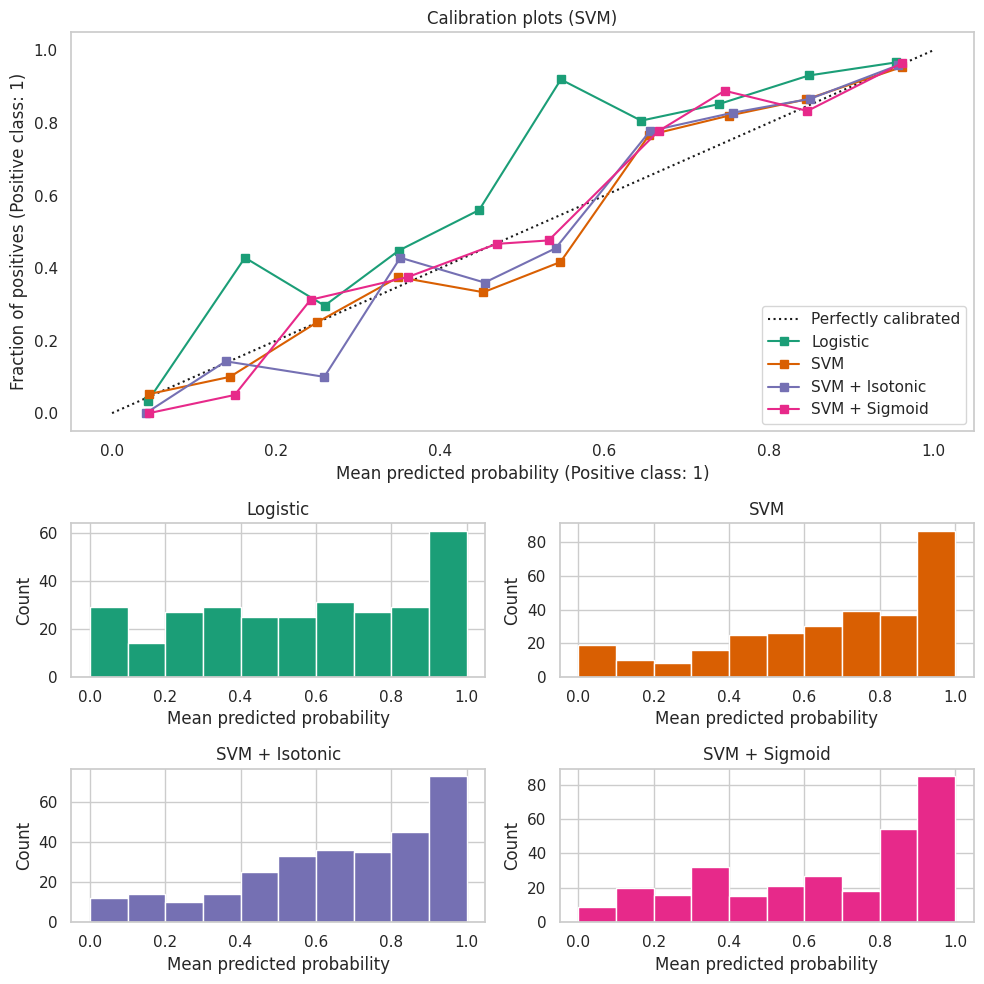

In [ ]:
# Code extracted from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
colors = plt.cm.get_cmap("Dark2")

svm_list = [
    (logreg, "Logistic"),
    (svm_model, "SVM"),
    (svm_sigmoid, "SVM + Isotonic"),
    (svm_isotonic, "SVM + Sigmoid")]

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(svm_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (SVM)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(svm_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
#plt.show()

plt.savefig('calibrationcurvesvm.png', dpi=400)

Calibration plot RF

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


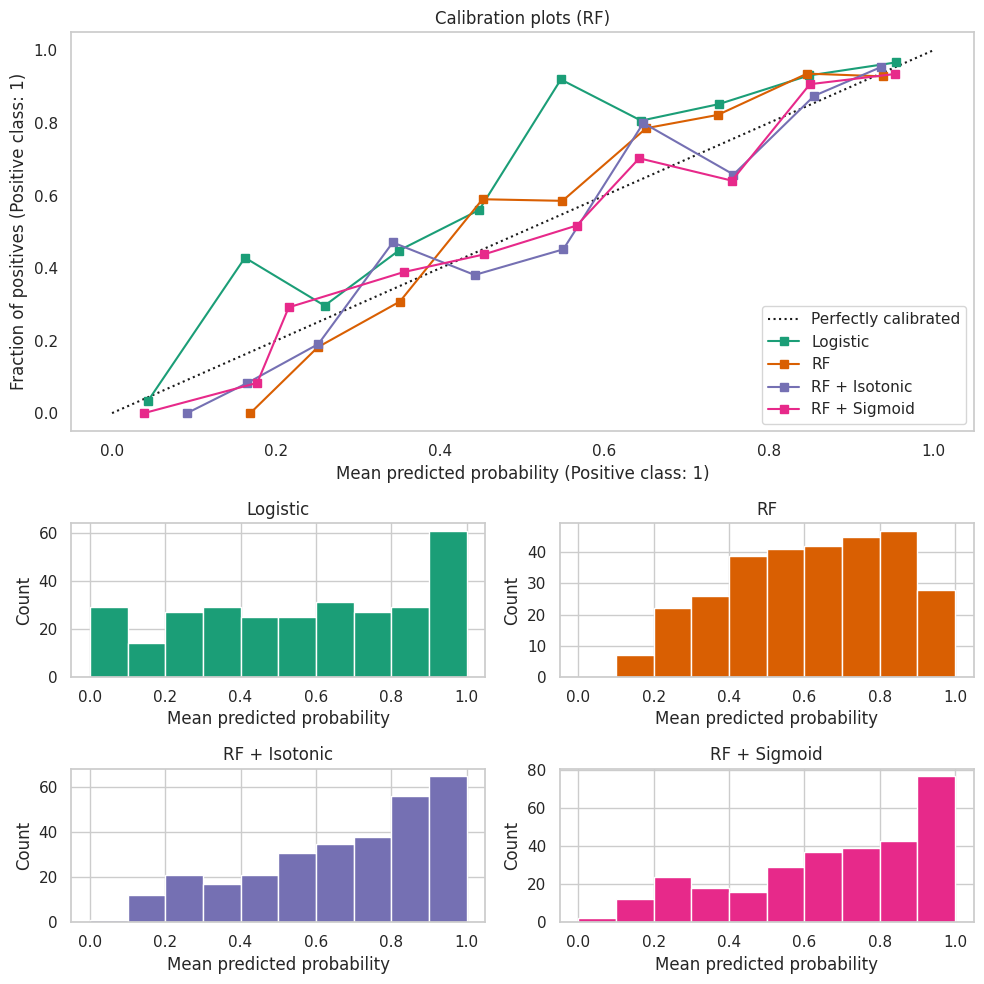

In [ ]:
# Code extracted from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html

rf_list = [
    (logreg, "Logistic"),
    (rf_model, "RF"),
    (rf_sigmoid, "RF + Isotonic"),
    (rf_isotonic, "RF + Sigmoid")]

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(rf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (RF)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(rf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
#plt.show()

plt.savefig('calibrationcurverf.png', dpi=400)

Table overview evaluation measures

In [ ]:
# Code extracted from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html
from collections import defaultdict
from sklearn.metrics import (precision_score, recall_score, f1_score, brier_score_loss, 
                             log_loss, roc_auc_score, accuracy_score)

scores_list = [(logreg, "Logistic"), (svm_model, "SVM"), (svm_sigmoid, "SVM + Isotonic"), 
               (svm_isotonic, "SVM + Sigmoid"), (rf_model, "RF"), 
               (rf_sigmoid, "RF + Isotonic"), (rf_isotonic, "RF + Sigmoid")]

scores = defaultdict(list)
for i, (clf, name) in enumerate(scores_list):
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    scores["Classifier"].append(name)

    for metric in [brier_score_loss, log_loss, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_prob[:, 1]))

    for metric in [precision_score, recall_score, f1_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_pred))

    score_df = pd.DataFrame(scores).set_index("Classifier")
    score_df.round(decimals=3)

#score_df

# Generate LaTeX table
latex_table = score_df.to_latex()

# Print or save the LaTeX table
print(latex_table)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


\begin{tabular}{lrrrrrr}
\toprule
{} &  Brier  loss &  Log loss &  Roc auc  &  Precision  &   Recall  &       F1  \\
Classifier     &              &           &           &             &           &           \\
\midrule
Logistic       &     0.147270 &  0.450415 &  0.871654 &    0.907514 &  0.788945 &  0.844086 \\
SVM            &     0.130898 &  0.412499 &  0.874705 &    0.903955 &  0.804020 &  0.851064 \\
SVM + Isotonic &     0.134753 &  0.421637 &  0.867962 &    0.815315 &  0.909548 &  0.859857 \\
SVM + Sigmoid  &     0.131242 &  0.415611 &  0.871347 &    0.848780 &  0.874372 &  0.861386 \\
RF             &     0.165093 &  0.501294 &  0.810327 &    0.807882 &  0.824121 &  0.815920 \\
RF + Isotonic  &     0.158015 &  0.480393 &  0.819557 &    0.791111 &  0.894472 &  0.839623 \\
RF + Sigmoid   &     0.159748 &  0.483924 &  0.818890 &    0.786667 &  0.889447 &  0.834906 \\
\bottomrule
\end{tabular}



<ipython-input-36-7a32bdbf6119>:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = score_df.to_latex()


**Error analysis** (graphs and significance tests generated by ChatGPT)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import roc_curve, auc

# Define split data
Sex_1 = df_thesis[df_thesis['Sex'] == 1]
Sex_0 = df_thesis[df_thesis['Sex'] == 0]
Level_1 = df_thesis[df_thesis['Level'] == 1]
Level_0 = df_thesis[df_thesis['Level'] == 0]
FAS_below_med = df_thesis[df_thesis['FAS'] < np.median(df_thesis['FAS'].values)]
FAS_above_med = df_thesis[df_thesis['FAS'] >= np.median(df_thesis['FAS'].values)]
age_below_med = df_thesis[df_thesis['Age_W1'] < np.median(df_thesis['Age_W1'].values)]
age_above_med = df_thesis[df_thesis['Age_W1'] >= np.median(df_thesis['Age_W1'].values)]

Gender

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


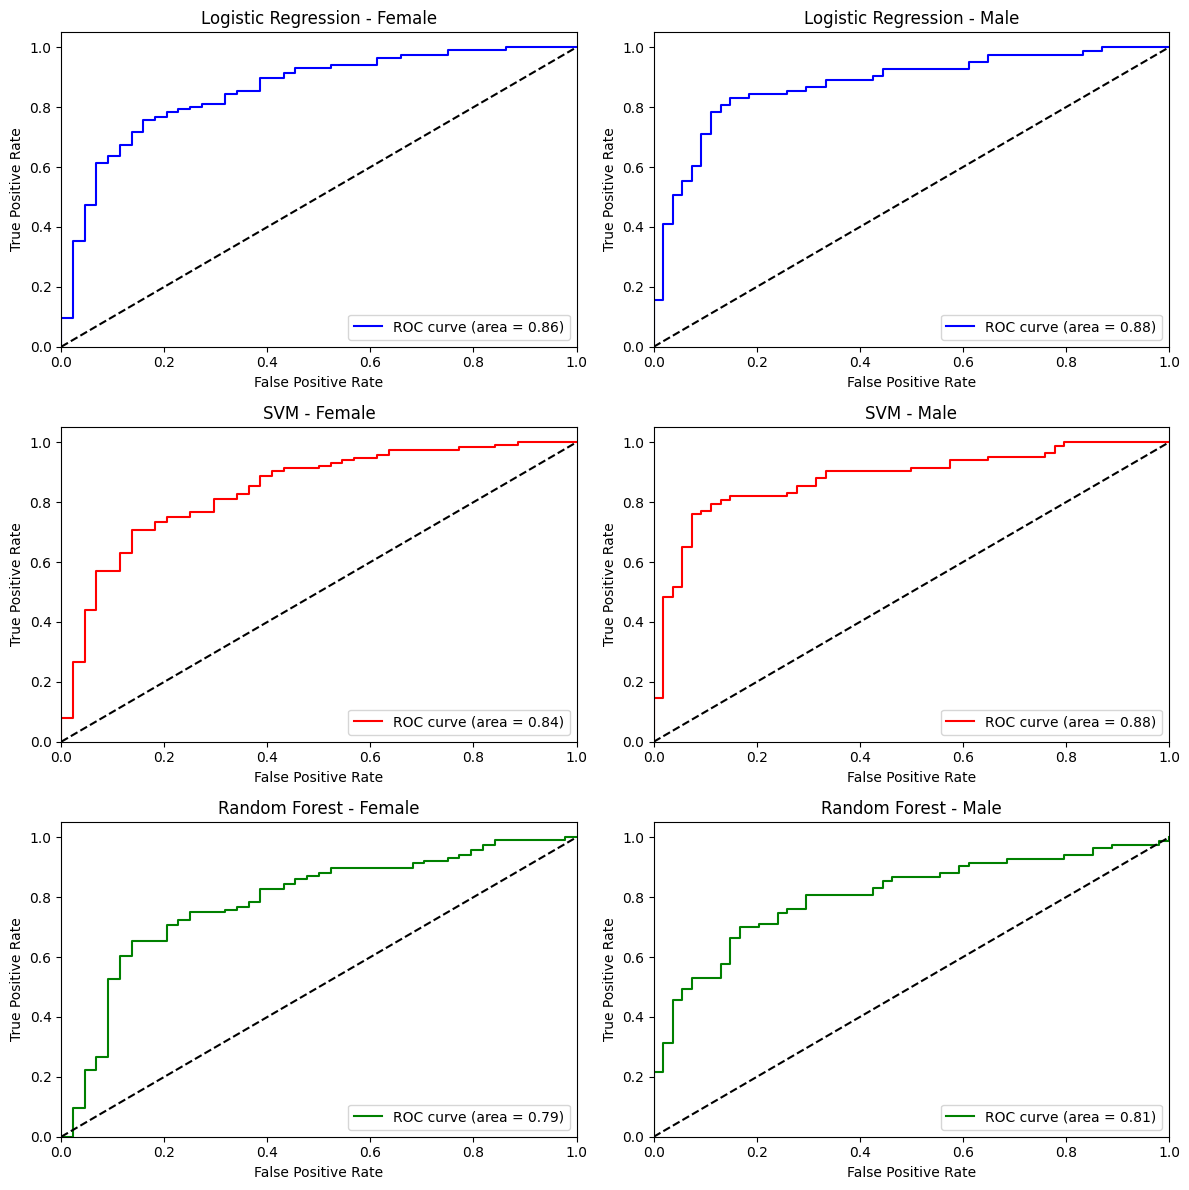

Mann-Whitney U statistic Logistic Regression: 0.0
p-value: 1.0
Mann-Whitney U statistic SVM: 0.0
p-value: 1.0
Mann-Whitney U statistic RF: 0.0
p-value: 1.0


In [ ]:
# Split the data into X and y
X_Sex_1 = Sex_1.drop(['Category', 'Scaled_Steps7', '7_calories_DRINKS'], axis=1)
y_Sex_1 = Sex_1['Category']

X_Sex_0 = Sex_0.drop(['Category', 'Scaled_Steps7', '7_calories_DRINKS'], axis=1)
y_Sex_0 = Sex_0['Category']

# Split the data into train and test sets for each gender group
X_Sex_1_train, X_Sex_1_test, y_Sex_1_train, y_Sex_1_test = train_test_split(X_Sex_1, y_Sex_1, test_size=0.2, stratify=y_Sex_1, random_state=100)
X_Sex_0_train, X_Sex_0_test, y_Sex_0_train, y_Sex_0_test = train_test_split(X_Sex_0, y_Sex_0, test_size=0.2,stratify=y_Sex_0, random_state=100)

# Train the models on each gender group
# Logistic Regression
logreg.fit(X_Sex_1_train, y_Sex_1_train)
logreg.fit(X_Sex_0_train, y_Sex_0_train)

# SVM
svm_model.fit(X_Sex_1_train, y_Sex_1_train)
svm_model.fit(X_Sex_0_train, y_Sex_0_train)

# Random Forest
rf_model.fit(X_Sex_1_train, y_Sex_1_train)
rf_model.fit(X_Sex_0_train, y_Sex_0_train)

# Predict probabilities for each model
y_scores_logreg_Sex_1 = logreg.predict_proba(X_Sex_1_test)[:, 1]
y_scores_logreg_Sex_0 = logreg.predict_proba(X_Sex_0_test)[:, 1]

y_scores_svm_Sex_1 = svm_model.predict_proba(X_Sex_1_test)[:, 1]
y_scores_svm_Sex_0 = svm_model.predict_proba(X_Sex_0_test)[:, 1]

y_scores_rf_Sex_1 = rf_model.predict_proba(X_Sex_1_test)[:, 1]
y_scores_rf_Sex_0 = rf_model.predict_proba(X_Sex_0_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_logreg_Sex_1, tpr_logreg_Sex_1, _ = roc_curve(y_Sex_1_test, y_scores_logreg_Sex_1)
roc_auc_logreg_Sex_1 = auc(fpr_logreg_Sex_1, tpr_logreg_Sex_1)

fpr_logreg_Sex_0, tpr_logreg_Sex_0, _ = roc_curve(y_Sex_0_test, y_scores_logreg_Sex_0)
roc_auc_logreg_Sex_0 = auc(fpr_logreg_Sex_0, tpr_logreg_Sex_0)

# Compute ROC curve and AUC for SVM
fpr_svm_Sex_1, tpr_svm_Sex_1, _ = roc_curve(y_Sex_1_test, y_scores_svm_Sex_1)
roc_auc_svm_Sex_1 = auc(fpr_svm_Sex_1, tpr_svm_Sex_1)

fpr_svm_Sex_0, tpr_svm_Sex_0, _ = roc_curve(y_Sex_0_test, y_scores_svm_Sex_0)
roc_auc_svm_Sex_0 = auc(fpr_svm_Sex_0, tpr_svm_Sex_0)

# Compute ROC curve and AUC for Random Forest
fpr_rf_Sex_1, tpr_rf_Sex_1, _ = roc_curve(y_Sex_1_test, y_scores_rf_Sex_1)
roc_auc_rf_Sex_1 = auc(fpr_rf_Sex_1, tpr_rf_Sex_1)

fpr_rf_Sex_0, tpr_rf_Sex_0, _ = roc_curve(y_Sex_0_test, y_scores_rf_Sex_0)
roc_auc_rf_Sex_0 = auc(fpr_rf_Sex_0, tpr_rf_Sex_0)

# Plotting the ROC curves
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Logreg - Sex_1
axs[0, 0].plot(fpr_logreg_Sex_1, tpr_logreg_Sex_1, color='b', label='ROC curve (area = %0.2f)' % roc_auc_logreg_Sex_1)
axs[0, 0].plot([0, 1], [0, 1], 'k--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Logistic Regression - Female')
axs[0, 0].legend(loc="lower right")

# Logreg - Sex_0
axs[0, 1].plot(fpr_logreg_Sex_0, tpr_logreg_Sex_0, color='b', label='ROC curve (area = %0.2f)' % roc_auc_logreg_Sex_0)
axs[0, 1].plot([0, 1], [0, 1], 'k--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Logistic Regression - Male')
axs[0, 1].legend(loc="lower right")

# SVM - Sex_1
axs[1, 0].plot(fpr_svm_Sex_1, tpr_svm_Sex_1, color='r', label='ROC curve (area = %0.2f)' % roc_auc_svm_Sex_1)
axs[1, 0].plot([0, 1], [0, 1], 'k--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('SVM - Female')
axs[1, 0].legend(loc="lower right")

# SVM - Sex_0
axs[1, 1].plot(fpr_svm_Sex_0, tpr_svm_Sex_0, color='r', label='ROC curve (area = %0.2f)' % roc_auc_svm_Sex_0)
axs[1, 1].plot([0, 1], [0, 1], 'k--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('SVM - Male')
axs[1, 1].legend(loc="lower right")

# Random Forest - Sex_1
axs[2, 0].plot(fpr_rf_Sex_1, tpr_rf_Sex_1, color='g', label='ROC curve (area = %0.2f)' % roc_auc_rf_Sex_1)
axs[2, 0].plot([0, 1], [0, 1], 'k--')
axs[2, 0].set_xlim([0.0, 1.0])
axs[2, 0].set_ylim([0.0, 1.05])
axs[2, 0].set_xlabel('False Positive Rate')
axs[2, 0].set_ylabel('True Positive Rate')
axs[2, 0].set_title('Random Forest - Female')
axs[2, 0].legend(loc="lower right")

# Random Forest - Sex_0
axs[2, 1].plot(fpr_rf_Sex_0, tpr_rf_Sex_0, color='g', label='ROC curve (area = %0.2f)' % roc_auc_rf_Sex_0)
axs[2, 1].plot([0, 1], [0, 1], 'k--')
axs[2, 1].set_xlim([0.0, 1.0])
axs[2, 1].set_ylim([0.0, 1.05])
axs[2, 1].set_xlabel('False Positive Rate')
axs[2, 1].set_ylabel('True Positive Rate')
axs[2, 1].set_title('Random Forest - Male')
axs[2, 1].legend(loc="lower right")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
#plt.show()

plt.savefig('errorgender.png')

statistic1, p_value1 = stats.mannwhitneyu(roc_auc_logreg_Sex_1, roc_auc_logreg_Sex_0)

print("Mann-Whitney U statistic Logistic Regression:", statistic1)
print("p-value:", p_value1)

statistic2, p_value2 = stats.mannwhitneyu(roc_auc_svm_Sex_1, roc_auc_svm_Sex_0)

print("Mann-Whitney U statistic SVM:", statistic2)
print("p-value:", p_value2)

statistic3, p_value3 = stats.mannwhitneyu(roc_auc_rf_Sex_1, roc_auc_rf_Sex_0)

print("Mann-Whitney U statistic RF:", statistic3)
print("p-value:", p_value3)

Level

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mann-Whitney U statistic Logistic Regression: 0.0
p-value: 1.0
Mann-Whitney U statistic SVM: 0.0
p-value: 1.0
Mann-Whitney U statistic RF: 0.0
p-value: 1.0


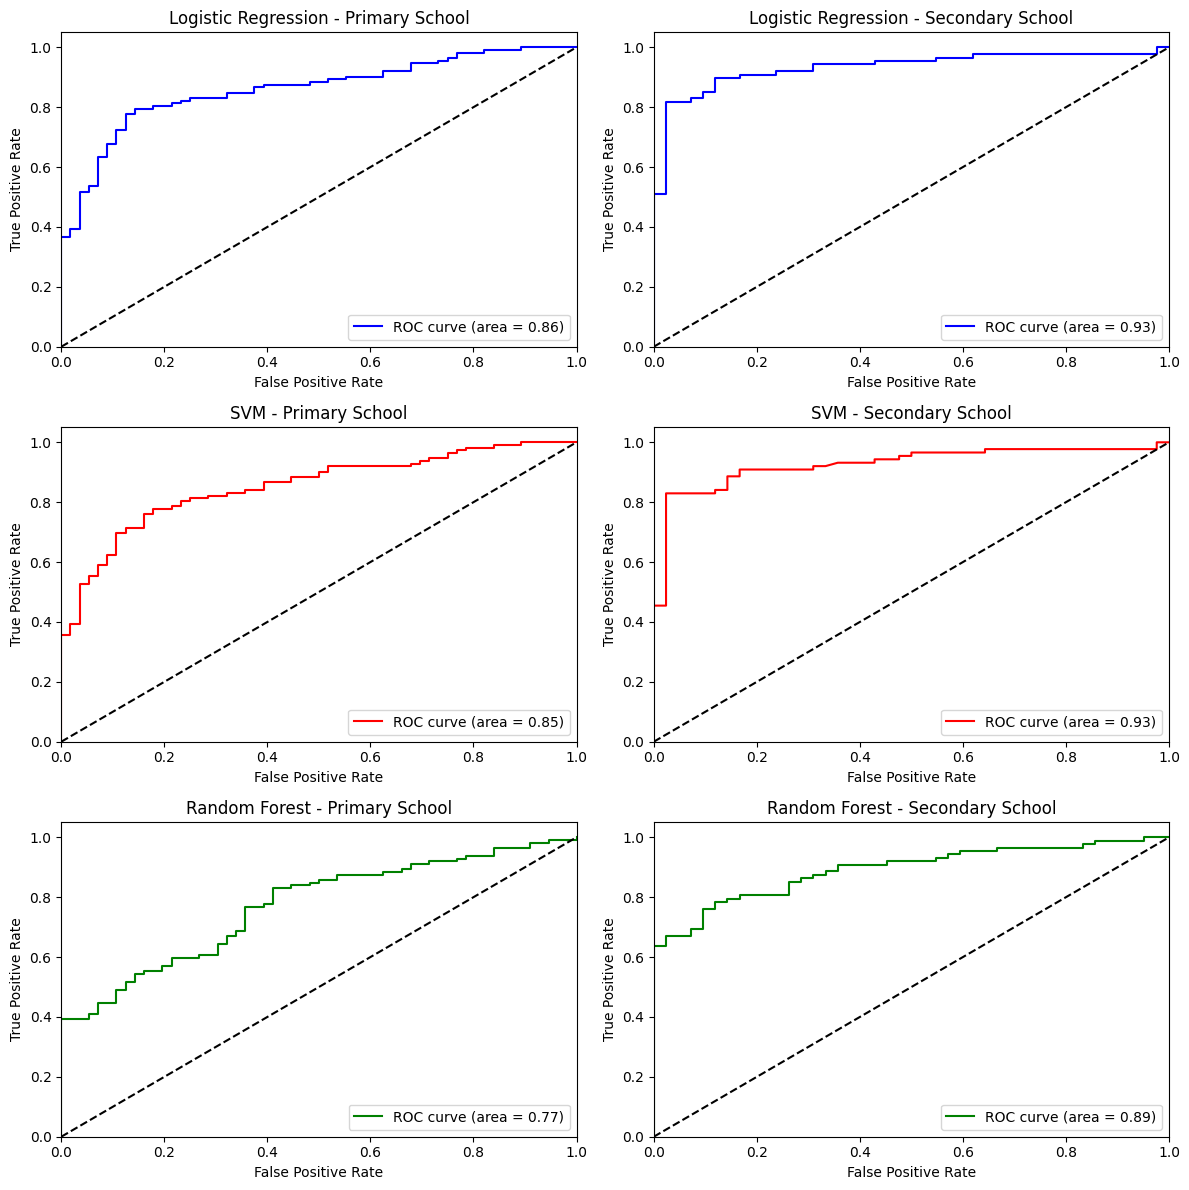

In [ ]:
# Split the data into X and y
X_Level_1 = Level_1.drop(['Category', 'Scaled_Steps7', '7_calories_DRINKS'], axis=1)
y_Level_1 = Level_1['Category']

X_Level_0 = Level_0.drop(['Category', 'Scaled_Steps7', '7_calories_DRINKS'], axis=1)
y_Level_0 = Level_0['Category']

# Split the data into train and test sets for each gender group
X_Level_1_train, X_Level_1_test, y_Level_1_train, y_Level_1_test = train_test_split(X_Level_1, y_Level_1, test_size=0.2, stratify=y_Level_1, random_state=100)
X_Level_0_train, X_Level_0_test, y_Level_0_train, y_Level_0_test = train_test_split(X_Level_0, y_Level_0, test_size=0.2,stratify=y_Level_0, random_state=100)

# Train the models on each gender group
# Logistic Regression
logreg.fit(X_Level_1_train, y_Level_1_train)
logreg.fit(X_Level_0_train, y_Level_0_train)

# SVM
svm_model.fit(X_Level_1_train, y_Level_1_train)
svm_model.fit(X_Level_0_train, y_Level_0_train)

# Random Forest
rf_model.fit(X_Level_1_train, y_Level_1_train)
rf_model.fit(X_Level_0_train, y_Level_0_train)

# Predict probabilities for each model
y_scores_logreg_Level_1 = logreg.predict_proba(X_Level_1_test)[:, 1]
y_scores_logreg_Level_0 = logreg.predict_proba(X_Level_0_test)[:, 1]

y_scores_svm_Level_1 = svm_model.predict_proba(X_Level_1_test)[:, 1]
y_scores_svm_Level_0 = svm_model.predict_proba(X_Level_0_test)[:, 1]

y_scores_rf_Level_1 = rf_model.predict_proba(X_Level_1_test)[:, 1]
y_scores_rf_Level_0 = rf_model.predict_proba(X_Level_0_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_logreg_Level_1, tpr_logreg_Level_1, _ = roc_curve(y_Level_1_test, y_scores_logreg_Level_1)
roc_auc_logreg_Level_1 = auc(fpr_logreg_Level_1, tpr_logreg_Level_1)

fpr_logreg_Level_0, tpr_logreg_Level_0, _ = roc_curve(y_Level_0_test, y_scores_logreg_Level_0)
roc_auc_logreg_Level_0 = auc(fpr_logreg_Level_0, tpr_logreg_Level_0)

# Compute ROC curve and AUC for SVM
fpr_svm_Level_1, tpr_svm_Level_1, _ = roc_curve(y_Level_1_test, y_scores_svm_Level_1)
roc_auc_svm_Level_1 = auc(fpr_svm_Level_1, tpr_svm_Level_1)

fpr_svm_Level_0, tpr_svm_Level_0, _ = roc_curve(y_Level_0_test, y_scores_svm_Level_0)
roc_auc_svm_Level_0 = auc(fpr_svm_Level_0, tpr_svm_Level_0)

# Compute ROC curve and AUC for Random Forest
fpr_rf_Level_1, tpr_rf_Level_1, _ = roc_curve(y_Level_1_test, y_scores_rf_Level_1)
roc_auc_rf_Level_1 = auc(fpr_rf_Level_1, tpr_rf_Level_1)

fpr_rf_Level_0, tpr_rf_Level_0, _ = roc_curve(y_Level_0_test, y_scores_rf_Level_0)
roc_auc_rf_Level_0 = auc(fpr_rf_Level_0, tpr_rf_Level_0)

# Plotting the ROC curves
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Logreg - Level_1
axs[0, 0].plot(fpr_logreg_Level_1, tpr_logreg_Level_1, color='b', label='ROC curve (area = %0.2f)' % roc_auc_logreg_Level_1)
axs[0, 0].plot([0, 1], [0, 1], 'k--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Logistic Regression - Primary School')
axs[0, 0].legend(loc="lower right")

# Logreg - Level_0
axs[0, 1].plot(fpr_logreg_Level_0, tpr_logreg_Level_0, color='b', label='ROC curve (area = %0.2f)' % roc_auc_logreg_Level_0)
axs[0, 1].plot([0, 1], [0, 1], 'k--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Logistic Regression - Secondary School')
axs[0, 1].legend(loc="lower right")

# SVM - Level_1
axs[1, 0].plot(fpr_svm_Level_1, tpr_svm_Level_1, color='r', label='ROC curve (area = %0.2f)' % roc_auc_svm_Level_1)
axs[1, 0].plot([0, 1], [0, 1], 'k--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('SVM - Primary School')
axs[1, 0].legend(loc="lower right")

# SVM - Level_0
axs[1, 1].plot(fpr_svm_Level_0, tpr_svm_Level_0, color='r', label='ROC curve (area = %0.2f)' % roc_auc_svm_Level_0)
axs[1, 1].plot([0, 1], [0, 1], 'k--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('SVM - Secondary School')
axs[1, 1].legend(loc="lower right")

# Random Forest - Level_1
axs[2, 0].plot(fpr_rf_Level_1, tpr_rf_Level_1, color='g', label='ROC curve (area = %0.2f)' % roc_auc_rf_Level_1)
axs[2, 0].plot([0, 1], [0, 1], 'k--')
axs[2, 0].set_xlim([0.0, 1.0])
axs[2, 0].set_ylim([0.0, 1.05])
axs[2, 0].set_xlabel('False Positive Rate')
axs[2, 0].set_ylabel('True Positive Rate')
axs[2, 0].set_title('Random Forest - Primary School')
axs[2, 0].legend(loc="lower right")

# Random Forest - Level_0
axs[2, 1].plot(fpr_rf_Level_0, tpr_rf_Level_0, color='g', label='ROC curve (area = %0.2f)' % roc_auc_rf_Level_0)
axs[2, 1].plot([0, 1], [0, 1], 'k--')
axs[2, 1].set_xlim([0.0, 1.0])
axs[2, 1].set_ylim([0.0, 1.05])
axs[2, 1].set_xlabel('False Positive Rate')
axs[2, 1].set_ylabel('True Positive Rate')
axs[2, 1].set_title('Random Forest - Secondary School')
axs[2, 1].legend(loc="lower right")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#plt.savefig('errorlevel.png')

statistic1, p_value1 = stats.mannwhitneyu(roc_auc_logreg_Level_1, roc_auc_logreg_Level_0)

print("Mann-Whitney U statistic Logistic Regression:", statistic1)
print("p-value:", p_value1)

statistic2, p_value2 = stats.mannwhitneyu(roc_auc_svm_Level_1, roc_auc_svm_Level_0)

print("Mann-Whitney U statistic SVM:", statistic2)
print("p-value:", p_value2)

statistic3, p_value3 = stats.mannwhitneyu(roc_auc_rf_Level_1, roc_auc_rf_Level_0)

print("Mann-Whitney U statistic RF:", statistic3)
print("p-value:", p_value3)

FAS

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


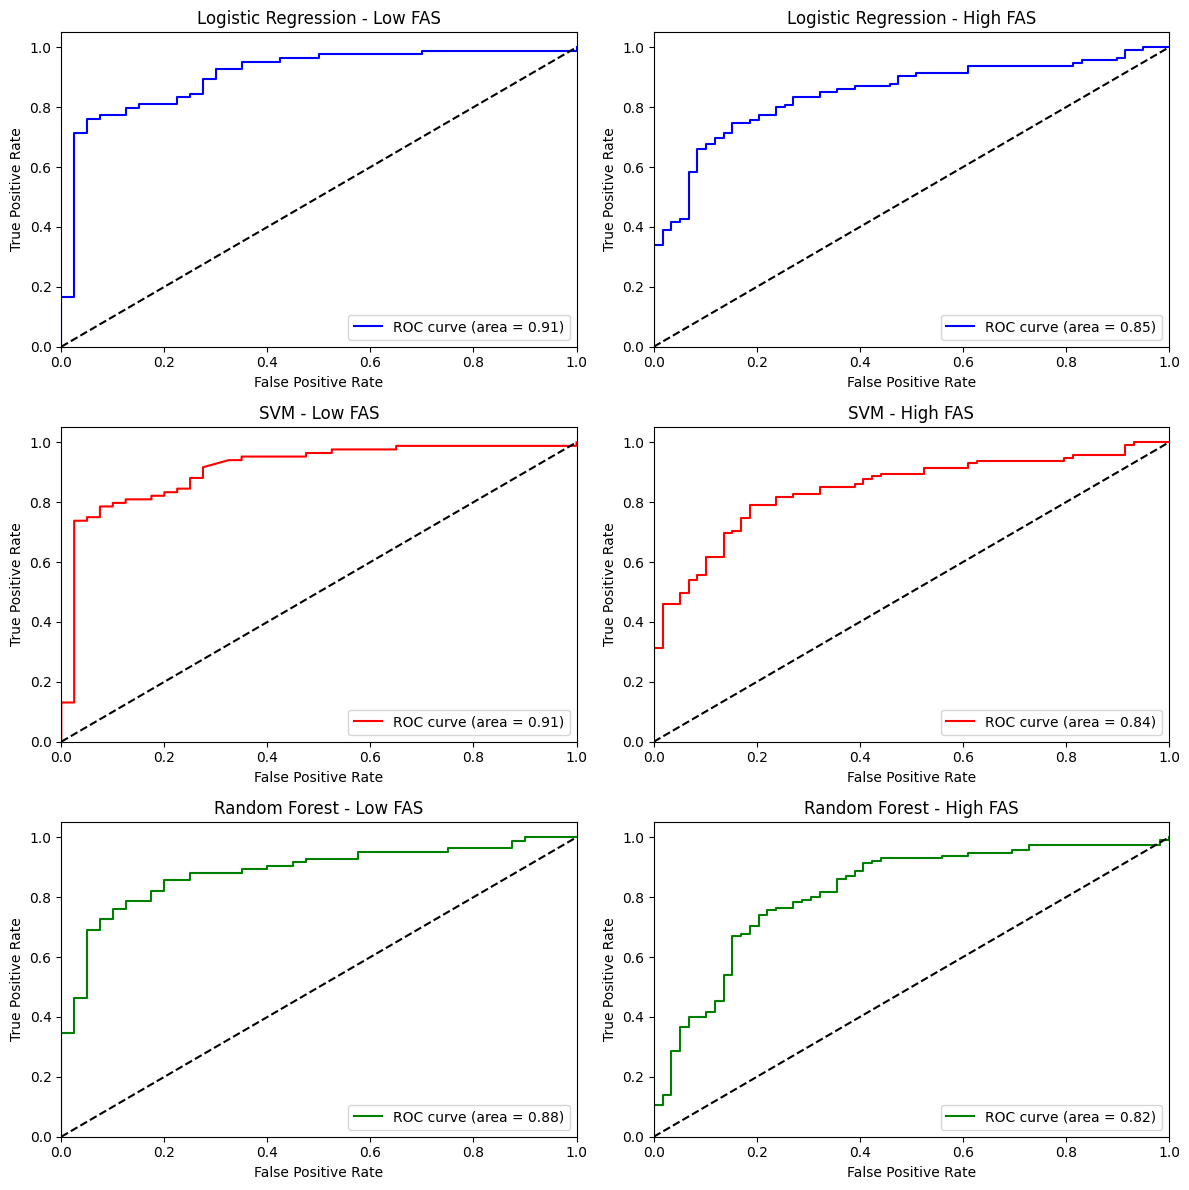

Mann-Whitney U statistic Logistic Regression: 1.0
p-value: 1.0
Mann-Whitney U statistic SVM: 1.0
p-value: 1.0
Mann-Whitney U statistic RF: 1.0
p-value: 1.0


In [ ]:
# Split the data into X and y
X_FAS_below_med = FAS_below_med.drop(['Category', 'Scaled_Steps7', '7_calories_DRINKS'], axis=1)
y_FAS_below_med = FAS_below_med['Category']

X_FAS_above_med = FAS_above_med.drop(['Category', 'Scaled_Steps7', '7_calories_DRINKS'], axis=1)
y_FAS_above_med = FAS_above_med['Category']

# Split the data into train and test sets for each gender group
X_FAS_below_med_train, X_FAS_below_med_test, y_FAS_below_med_train, y_FAS_below_med_test = train_test_split(X_FAS_below_med, y_FAS_below_med, test_size=0.2, stratify=y_FAS_below_med, random_state=100)
X_FAS_above_med_train, X_FAS_above_med_test, y_FAS_above_med_train, y_FAS_above_med_test = train_test_split(X_FAS_above_med, y_FAS_above_med, test_size=0.2,stratify=y_FAS_above_med, random_state=100)

# Train the models on each gender group
# Logistic Regression
logreg.fit(X_FAS_below_med_train, y_FAS_below_med_train)
logreg.fit(X_FAS_above_med_train, y_FAS_above_med_train)

# SVM
svm_model.fit(X_FAS_below_med_train, y_FAS_below_med_train)
svm_model.fit(X_FAS_above_med_train, y_FAS_above_med_train)

# Random Forest
rf_model.fit(X_FAS_below_med_train, y_FAS_below_med_train)
rf_model.fit(X_FAS_above_med_train, y_FAS_above_med_train)

# Predict probabilities for each model
y_scores_logreg_FAS_below_med = logreg.predict_proba(X_FAS_below_med_test)[:, 1]
y_scores_logreg_FAS_above_med = logreg.predict_proba(X_FAS_above_med_test)[:, 1]

y_scores_svm_FAS_below_med = svm_model.predict_proba(X_FAS_below_med_test)[:, 1]
y_scores_svm_FAS_above_med = svm_model.predict_proba(X_FAS_above_med_test)[:, 1]

y_scores_rf_FAS_below_med = rf_model.predict_proba(X_FAS_below_med_test)[:, 1]
y_scores_rf_FAS_above_med = rf_model.predict_proba(X_FAS_above_med_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_logreg_FAS_below_med, tpr_logreg_FAS_below_med, _ = roc_curve(y_FAS_below_med_test, y_scores_logreg_FAS_below_med)
roc_auc_logreg_FAS_below_med = auc(fpr_logreg_FAS_below_med, tpr_logreg_FAS_below_med)

fpr_logreg_FAS_above_med, tpr_logreg_FAS_above_med, _ = roc_curve(y_FAS_above_med_test, y_scores_logreg_FAS_above_med)
roc_auc_logreg_FAS_above_med = auc(fpr_logreg_FAS_above_med, tpr_logreg_FAS_above_med)

# Compute ROC curve and AUC for SVM
fpr_svm_FAS_below_med, tpr_svm_FAS_below_med, _ = roc_curve(y_FAS_below_med_test, y_scores_svm_FAS_below_med)
roc_auc_svm_FAS_below_med = auc(fpr_svm_FAS_below_med, tpr_svm_FAS_below_med)

fpr_svm_FAS_above_med, tpr_svm_FAS_above_med, _ = roc_curve(y_FAS_above_med_test, y_scores_svm_FAS_above_med)
roc_auc_svm_FAS_above_med = auc(fpr_svm_FAS_above_med, tpr_svm_FAS_above_med)

# Compute ROC curve and AUC for Random Forest
fpr_rf_FAS_below_med, tpr_rf_FAS_below_med, _ = roc_curve(y_FAS_below_med_test, y_scores_rf_FAS_below_med)
roc_auc_rf_FAS_below_med = auc(fpr_rf_FAS_below_med, tpr_rf_FAS_below_med)

fpr_rf_FAS_above_med, tpr_rf_FAS_above_med, _ = roc_curve(y_FAS_above_med_test, y_scores_rf_FAS_above_med)
roc_auc_rf_FAS_above_med = auc(fpr_rf_FAS_above_med, tpr_rf_FAS_above_med)

# Plotting the ROC curves
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Logreg - FAS_below_med
axs[0, 0].plot(fpr_logreg_FAS_below_med, tpr_logreg_FAS_below_med, color='b', label='ROC curve (area = %0.2f)' % roc_auc_logreg_FAS_below_med)
axs[0, 0].plot([0, 1], [0, 1], 'k--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Logistic Regression - Low FAS')
axs[0, 0].legend(loc="lower right")

# Logreg - FAS_above_med
axs[0, 1].plot(fpr_logreg_FAS_above_med, tpr_logreg_FAS_above_med, color='b', label='ROC curve (area = %0.2f)' % roc_auc_logreg_FAS_above_med)
axs[0, 1].plot([0, 1], [0, 1], 'k--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Logistic Regression - High FAS')
axs[0, 1].legend(loc="lower right")

# SVM - FAS_below_med
axs[1, 0].plot(fpr_svm_FAS_below_med, tpr_svm_FAS_below_med, color='r', label='ROC curve (area = %0.2f)' % roc_auc_svm_FAS_below_med)
axs[1, 0].plot([0, 1], [0, 1], 'k--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('SVM - Low FAS')
axs[1, 0].legend(loc="lower right")

# SVM - FAS_above_med
axs[1, 1].plot(fpr_svm_FAS_above_med, tpr_svm_FAS_above_med, color='r', label='ROC curve (area = %0.2f)' % roc_auc_svm_FAS_above_med)
axs[1, 1].plot([0, 1], [0, 1], 'k--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('SVM - High FAS')
axs[1, 1].legend(loc="lower right")

# Random Forest - FAS_below_med
axs[2, 0].plot(fpr_rf_FAS_below_med, tpr_rf_FAS_below_med, color='g', label='ROC curve (area = %0.2f)' % roc_auc_rf_FAS_below_med)
axs[2, 0].plot([0, 1], [0, 1], 'k--')
axs[2, 0].set_xlim([0.0, 1.0])
axs[2, 0].set_ylim([0.0, 1.05])
axs[2, 0].set_xlabel('False Positive Rate')
axs[2, 0].set_ylabel('True Positive Rate')
axs[2, 0].set_title('Random Forest - Low FAS')
axs[2, 0].legend(loc="lower right")

# Random Forest - FAS_above_med
axs[2, 1].plot(fpr_rf_FAS_above_med, tpr_rf_FAS_above_med, color='g', label='ROC curve (area = %0.2f)' % roc_auc_rf_FAS_above_med)
axs[2, 1].plot([0, 1], [0, 1], 'k--')
axs[2, 1].set_xlim([0.0, 1.0])
axs[2, 1].set_ylim([0.0, 1.05])
axs[2, 1].set_xlabel('False Positive Rate')
axs[2, 1].set_ylabel('True Positive Rate')
axs[2, 1].set_title('Random Forest - High FAS')
axs[2, 1].legend(loc="lower right")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#plt.savefig('errorFAS.png')

statistic1, p_value1 = stats.mannwhitneyu(roc_auc_logreg_FAS_below_med, roc_auc_logreg_FAS_above_med)

print("Mann-Whitney U statistic Logistic Regression:", statistic1)
print("p-value:", p_value1)

statistic2, p_value2 = stats.mannwhitneyu(roc_auc_svm_FAS_below_med, roc_auc_svm_FAS_above_med)

print("Mann-Whitney U statistic SVM:", statistic2)
print("p-value:", p_value2)

statistic3, p_value3 = stats.mannwhitneyu(roc_auc_rf_FAS_below_med, roc_auc_rf_FAS_above_med)

print("Mann-Whitney U statistic RF:", statistic3)
print("p-value:", p_value3)

Age

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


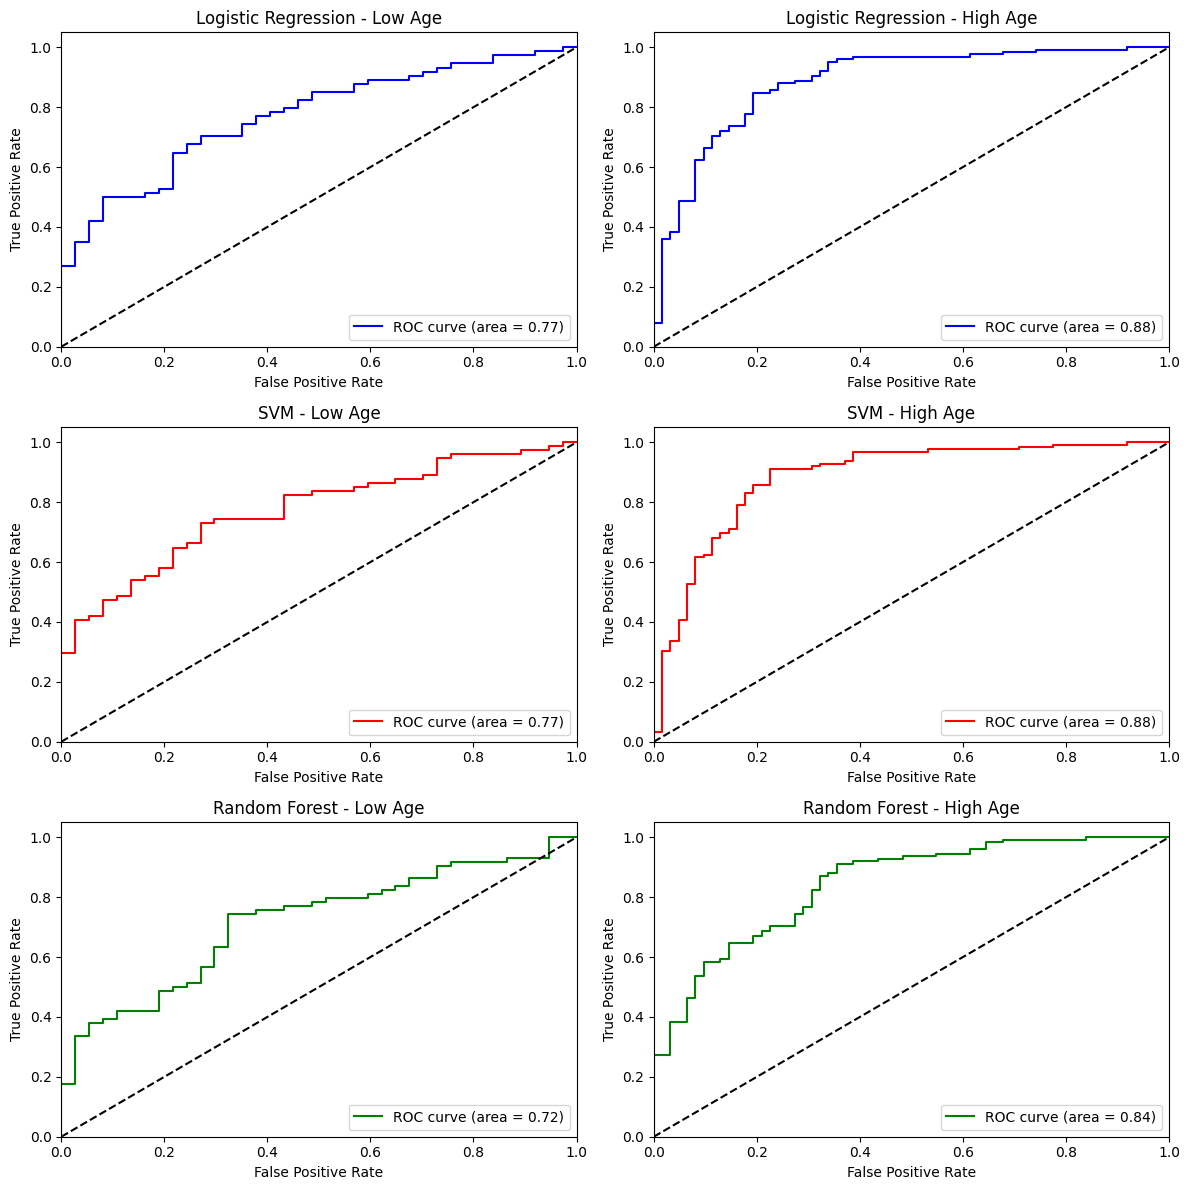

Mann-Whitney U statistic Logistic Regression: 0.0
p-value: 1.0
Mann-Whitney U statistic SVM: 0.0
p-value: 1.0
Mann-Whitney U statistic RF: 0.0
p-value: 1.0


In [ ]:
# Split the data into X and y
X_age_below_med = age_below_med.drop(['Category', 'Scaled_Steps7', '7_calories_DRINKS'], axis=1)
y_age_below_med = age_below_med['Category']

X_age_above_med = age_above_med.drop(['Category', 'Scaled_Steps7', '7_calories_DRINKS'], axis=1)
y_age_above_med = age_above_med['Category']

# Split the data into train and test sets for each gender group
X_age_below_med_train, X_age_below_med_test, y_age_below_med_train, y_age_below_med_test = train_test_split(X_age_below_med, y_age_below_med, test_size=0.2, stratify=y_age_below_med, random_state=100)
X_age_above_med_train, X_age_above_med_test, y_age_above_med_train, y_age_above_med_test = train_test_split(X_age_above_med, y_age_above_med, test_size=0.2,stratify=y_age_above_med, random_state=100)

# Train the models on each gender group
# Logistic Regression
logreg.fit(X_age_below_med_train, y_age_below_med_train)
logreg.fit(X_age_above_med_train, y_age_above_med_train)

# SVM
svm_model.fit(X_age_below_med_train, y_age_below_med_train)
svm_model.fit(X_age_above_med_train, y_age_above_med_train)

# Random Forest
rf_model.fit(X_age_below_med_train, y_age_below_med_train)
rf_model.fit(X_age_above_med_train, y_age_above_med_train)

# Predict probabilities for each model
y_scores_logreg_age_below_med = logreg.predict_proba(X_age_below_med_test)[:, 1]
y_scores_logreg_age_above_med = logreg.predict_proba(X_age_above_med_test)[:, 1]

y_scores_svm_age_below_med = svm_model.predict_proba(X_age_below_med_test)[:, 1]
y_scores_svm_age_above_med = svm_model.predict_proba(X_age_above_med_test)[:, 1]

y_scores_rf_age_below_med = rf_model.predict_proba(X_age_below_med_test)[:, 1]
y_scores_rf_age_above_med = rf_model.predict_proba(X_age_above_med_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_logreg_age_below_med, tpr_logreg_age_below_med, _ = roc_curve(y_age_below_med_test, y_scores_logreg_age_below_med)
roc_auc_logreg_age_below_med = auc(fpr_logreg_age_below_med, tpr_logreg_age_below_med)

fpr_logreg_age_above_med, tpr_logreg_age_above_med, _ = roc_curve(y_age_above_med_test, y_scores_logreg_age_above_med)
roc_auc_logreg_age_above_med = auc(fpr_logreg_age_above_med, tpr_logreg_age_above_med)

# Compute ROC curve and AUC for SVM
fpr_svm_age_below_med, tpr_svm_age_below_med, _ = roc_curve(y_age_below_med_test, y_scores_svm_age_below_med)
roc_auc_svm_age_below_med = auc(fpr_svm_age_below_med, tpr_svm_age_below_med)

fpr_svm_age_above_med, tpr_svm_age_above_med, _ = roc_curve(y_age_above_med_test, y_scores_svm_age_above_med)
roc_auc_svm_age_above_med = auc(fpr_svm_age_above_med, tpr_svm_age_above_med)

# Compute ROC curve and AUC for Random Forest
fpr_rf_age_below_med, tpr_rf_age_below_med, _ = roc_curve(y_age_below_med_test, y_scores_rf_age_below_med)
roc_auc_rf_age_below_med = auc(fpr_rf_age_below_med, tpr_rf_age_below_med)

fpr_rf_age_above_med, tpr_rf_age_above_med, _ = roc_curve(y_age_above_med_test, y_scores_rf_age_above_med)
roc_auc_rf_age_above_med = auc(fpr_rf_age_above_med, tpr_rf_age_above_med)

# Plotting the ROC curves
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Logreg - age_below_med
axs[0, 0].plot(fpr_logreg_age_below_med, tpr_logreg_age_below_med, color='b', label='ROC curve (area = %0.2f)' % roc_auc_logreg_age_below_med)
axs[0, 0].plot([0, 1], [0, 1], 'k--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Logistic Regression - Low Age')
axs[0, 0].legend(loc="lower right")

# Logreg - age_above_med
axs[0, 1].plot(fpr_logreg_age_above_med, tpr_logreg_age_above_med, color='b', label='ROC curve (area = %0.2f)' % roc_auc_logreg_age_above_med)
axs[0, 1].plot([0, 1], [0, 1], 'k--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Logistic Regression - High Age')
axs[0, 1].legend(loc="lower right")

# SVM - age_below_med
axs[1, 0].plot(fpr_svm_age_below_med, tpr_svm_age_below_med, color='r', label='ROC curve (area = %0.2f)' % roc_auc_svm_age_below_med)
axs[1, 0].plot([0, 1], [0, 1], 'k--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('SVM - Low Age')
axs[1, 0].legend(loc="lower right")

# SVM - age_above_med
axs[1, 1].plot(fpr_svm_age_above_med, tpr_svm_age_above_med, color='r', label='ROC curve (area = %0.2f)' % roc_auc_svm_age_above_med)
axs[1, 1].plot([0, 1], [0, 1], 'k--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('SVM - High Age')
axs[1, 1].legend(loc="lower right")

# Random Forest - age_below_med
axs[2, 0].plot(fpr_rf_age_below_med, tpr_rf_age_below_med, color='g', label='ROC curve (area = %0.2f)' % roc_auc_rf_age_below_med)
axs[2, 0].plot([0, 1], [0, 1], 'k--')
axs[2, 0].set_xlim([0.0, 1.0])
axs[2, 0].set_ylim([0.0, 1.05])
axs[2, 0].set_xlabel('False Positive Rate')
axs[2, 0].set_ylabel('True Positive Rate')
axs[2, 0].set_title('Random Forest - Low Age')
axs[2, 0].legend(loc="lower right")

# Random Forest - age_above_med
axs[2, 1].plot(fpr_rf_age_above_med, tpr_rf_age_above_med, color='g', label='ROC curve (area = %0.2f)' % roc_auc_rf_age_above_med)
axs[2, 1].plot([0, 1], [0, 1], 'k--')
axs[2, 1].set_xlim([0.0, 1.0])
axs[2, 1].set_ylim([0.0, 1.05])
axs[2, 1].set_xlabel('False Positive Rate')
axs[2, 1].set_ylabel('True Positive Rate')
axs[2, 1].set_title('Random Forest - High Age')
axs[2, 1].legend(loc="lower right")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#plt.savefig('errorage.png')

statistic1, p_value1 = stats.mannwhitneyu(roc_auc_logreg_age_below_med, roc_auc_logreg_age_above_med)

print("Mann-Whitney U statistic Logistic Regression:", statistic1)
print("p-value:", p_value1)

statistic2, p_value2 = stats.mannwhitneyu(roc_auc_svm_age_below_med, roc_auc_svm_age_above_med)

print("Mann-Whitney U statistic SVM:", statistic2)
print("p-value:", p_value2)

statistic3, p_value3 = stats.mannwhitneyu(roc_auc_rf_age_below_med, roc_auc_rf_age_above_med)

print("Mann-Whitney U statistic RF:", statistic3)
print("p-value:", p_value3)